In [4]:
#dti_metric choose 'FA','MD','RD' or 'AD'
dti_metric='FA'




addtocc='_all_woimputed' #addtocc='_46removed'

sujectpreprocfile='Subject_preproc'+addtocc+'.csv'
namefeature=addtocc[1:]+'_SavedFeaturesSelectedBackward20to2_CC'


nFeatures=5

RandomState=0
nclust=2
#KNN
knn_test_size=0.1
looking_for_best_k=1
knn_K_num_shuffles = 100  ## MOVED in the top section 
num_shuffles = knn_K_num_shuffles

make_jointplot=0

#________________________________________________________________________

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SequentialFeatureSelector

cwd = os.getcwd()
print(cwd)
# pathfile=r'D:\DATA\Aging_DTI_SHARED_NEW'
pathfile=r'/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA_LINUX_SHARED/Aging_DTI_SHARED_NEW/'
pathsavefigure=r'/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA_LINUX_SHARED/Aging_DTI_SHARED_NEW/FIGURES/'
# pathsavefigure=r'D:\DATA\Aging_DTI_SHARED_NEW/FIGURES/'

os.chdir(pathfile)
cwd = os.getcwd()

##  OPEN DATA FILE / CSV subject

SubjectTable= pd.read_csv(sujectpreprocfile, sep=",")

SubjectTable

/media/nicolascatz/4d767acb-7d35-42a5-b630-86a61f8774d0/nicolascatz/DATA_LINUX_SHARED/Aging_DTI_SHARED_NEW


,sub,age,JND_P,group_O,group_Y,group,sex
0,1.0,25.0,9.5600,0.0,1.0,Y,F
1,2.0,27.0,6.6900,0.0,1.0,Y,M
2,3.0,28.0,12.9200,0.0,1.0,Y,F
3,5.0,21.0,1.9500,0.0,1.0,Y,F
4,6.0,25.0,2.5400,0.0,1.0,Y,F
5,8.0,67.0,4.4800,1.0,0.0,O,F
6,9.0,73.0,9.6300,1.0,0.0,O,M
7,10.0,64.0,7.2700,1.0,0.0,O,F
8,11.0,21.0,1.6200,0.0,1.0,Y,F
9,12.0,21.0,3.6800,0.0,1.0,Y,M


In [5]:

## create 2 groups of JND below and above median of JND q=2

labels = [0,1]

SubjectTable['JND_group'] = pd.qcut(SubjectTable['JND_P'], q=2, labels=labels)
SubjectTable['JND_group'] = pd.qcut(SubjectTable['JND_P'], q=2, labels=labels)


SubjectTable

,sub,age,JND_P,group_O,group_Y,group,sex,JND_group
0,1.0,25.0,9.5600,0.0,1.0,Y,F,1
1,2.0,27.0,6.6900,0.0,1.0,Y,M,0
2,3.0,28.0,12.9200,0.0,1.0,Y,F,1
3,5.0,21.0,1.9500,0.0,1.0,Y,F,0
4,6.0,25.0,2.5400,0.0,1.0,Y,F,0
5,8.0,67.0,4.4800,1.0,0.0,O,F,0
6,9.0,73.0,9.6300,1.0,0.0,O,M,1
7,10.0,64.0,7.2700,1.0,0.0,O,F,1
8,11.0,21.0,1.6200,0.0,1.0,Y,F,0
9,12.0,21.0,3.6800,0.0,1.0,Y,M,0


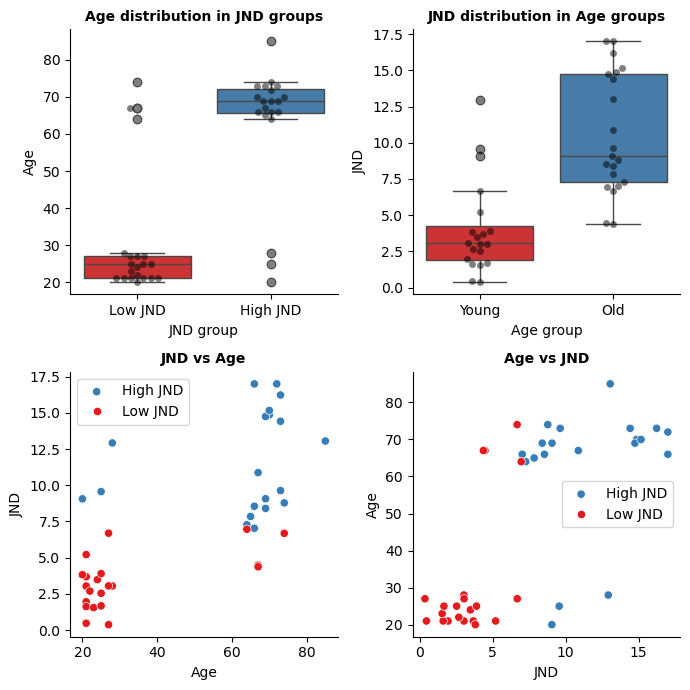

In [6]:

fig, ax = plt.subplots(2, 2, figsize=(7, 7))

sns.boxplot(x='JND_group', y='age', data=SubjectTable,  palette='Set1',ax=ax[0,0])
ax[0,0].set_title('Age distribution in JND groups', fontsize=10, fontweight='bold')
sns.swarmplot(x='JND_group', y='age', data=SubjectTable, color='black', alpha=0.5,ax=ax[0,0])
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].set_xticklabels(['Low JND','High JND'])
ax[0,0].set_xlabel('JND group')
ax[0,0].set_ylabel('Age')

sns.boxplot(x='group', y='JND_P', data=SubjectTable, palette='Set1',ax=ax[0,1])
ax[0,1].set_title('JND distribution in Age groups', fontsize=10, fontweight='bold')
sns.swarmplot(x='group', y='JND_P', data=SubjectTable, color='black', alpha=0.5,ax=ax[0,1])
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[0,1].set_xticklabels(['Young','Old'])
ax[0,1].set_xlabel('Age group')
ax[0,1].set_ylabel('JND')

sns.scatterplot(x='age', y='JND_P', data=SubjectTable, hue='JND_group', palette='Set1',ax=ax[1,0],legend=['Low JND','High JND'])
ax[1,0].set_title('JND vs Age', fontsize=10, fontweight='bold')
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,0].set_xlabel('Age')
ax[1,0].set_ylabel('JND')
ax[1,0].legend(['High JND','Low JND'])


sns.scatterplot(x='JND_P', y='age', data=SubjectTable, hue='JND_group', palette='Set1',ax=ax[1,1])
ax[1,1].set_title('Age vs JND', fontsize=10, fontweight='bold')
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
ax[1,1].set_xlabel('JND')
ax[1,1].set_ylabel('Age')
ax[1,1].legend(['High JND','Low JND'])


plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'JND vs Age_figure1.pdf'), dpi=300, bbox_inches='tight')





In [7]:
dataDTIallCC=[]

list_of_selfeaturesallCC=[]
for CC in range(1,8):
    print('CC_'+str(CC) +'_'+dti_metric+addtocc+'.csv')
    dataDTI = pd.read_csv('CC_'+str(CC) +'_'+dti_metric+addtocc+'.csv', sep=",")
    dataDTIallCC.append(dataDTI)

    list_of_selfeatures_all=np.load(namefeature+str(CC)+'_FA.npy',allow_pickle=True)
    list_of_selfeaturesallCC.append(list_of_selfeatures_all)




CC_1_FA_all_woimputed.csv
CC_2_FA_all_woimputed.csv
CC_3_FA_all_woimputed.csv
CC_4_FA_all_woimputed.csv
CC_5_FA_all_woimputed.csv
CC_6_FA_all_woimputed.csv
CC_7_FA_all_woimputed.csv


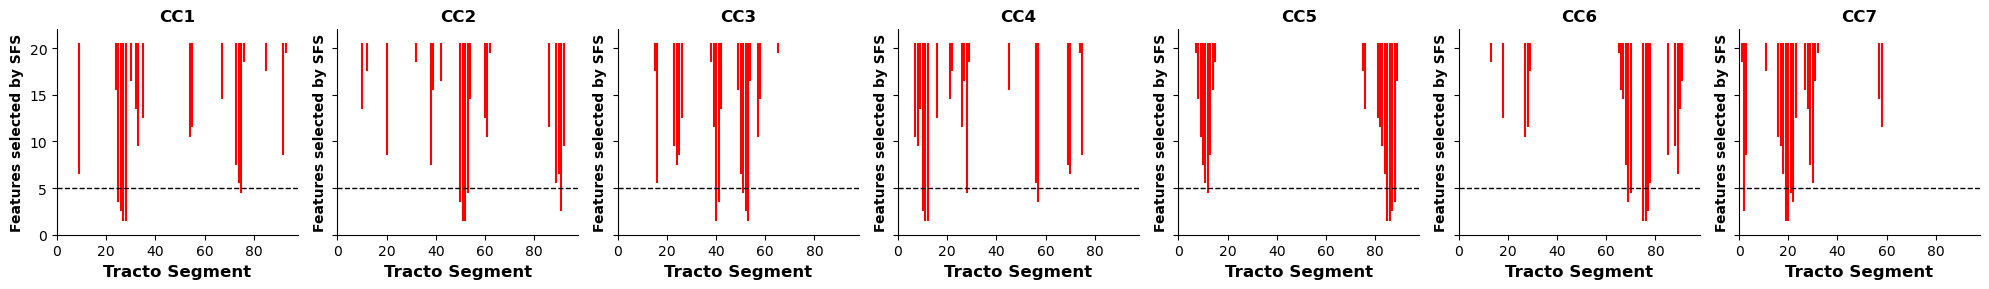

In [8]:

fig, axs = plt.subplots(1, 7, figsize=(20, 3),sharey='row')

for CC in range(0,7):
    list_of_selfeatures_all=list_of_selfeaturesallCC[CC]
    
    for i in [20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2]:
        x=[i]*len(list_of_selfeatures_all[i])
        y=np.zeros(len(list_of_selfeatures_all[i]))
        for k in range(len(list_of_selfeatures_all[i])):
            y[k]=int(list_of_selfeatures_all[i][k])
            list(list_of_selfeatures_all[i])
            # create a vertical plot

        axs[CC].eventplot(y, colors='red', lineoffsets=i,linelengths=1, orientation='horizontal')

    axs[CC].set_xlabel("Tracto Segment", fontsize=12, fontweight='bold')
    axs[CC].set_ylabel("Features selected by SFS", fontsize=10, fontweight='bold')
    axs[CC].set_xlim(0,98)
    axs[CC].spines['top'].set_visible(False)
    axs[CC].spines['right'].set_visible(False)
    #axs[CC-1].suptitle(u'Segment selected vs feature ID during Backward SFS from 20 to 2', fontsize=12, fontweight='bold')
    axs[CC].axhline(y=nFeatures, color='k', linestyle='--', linewidth=1)
    axs[CC].set_title('CC'+str(CC+1), fontsize=12, fontweight='bold')
plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'figure2.pdf'), dpi=300, bbox_inches='tight')
          


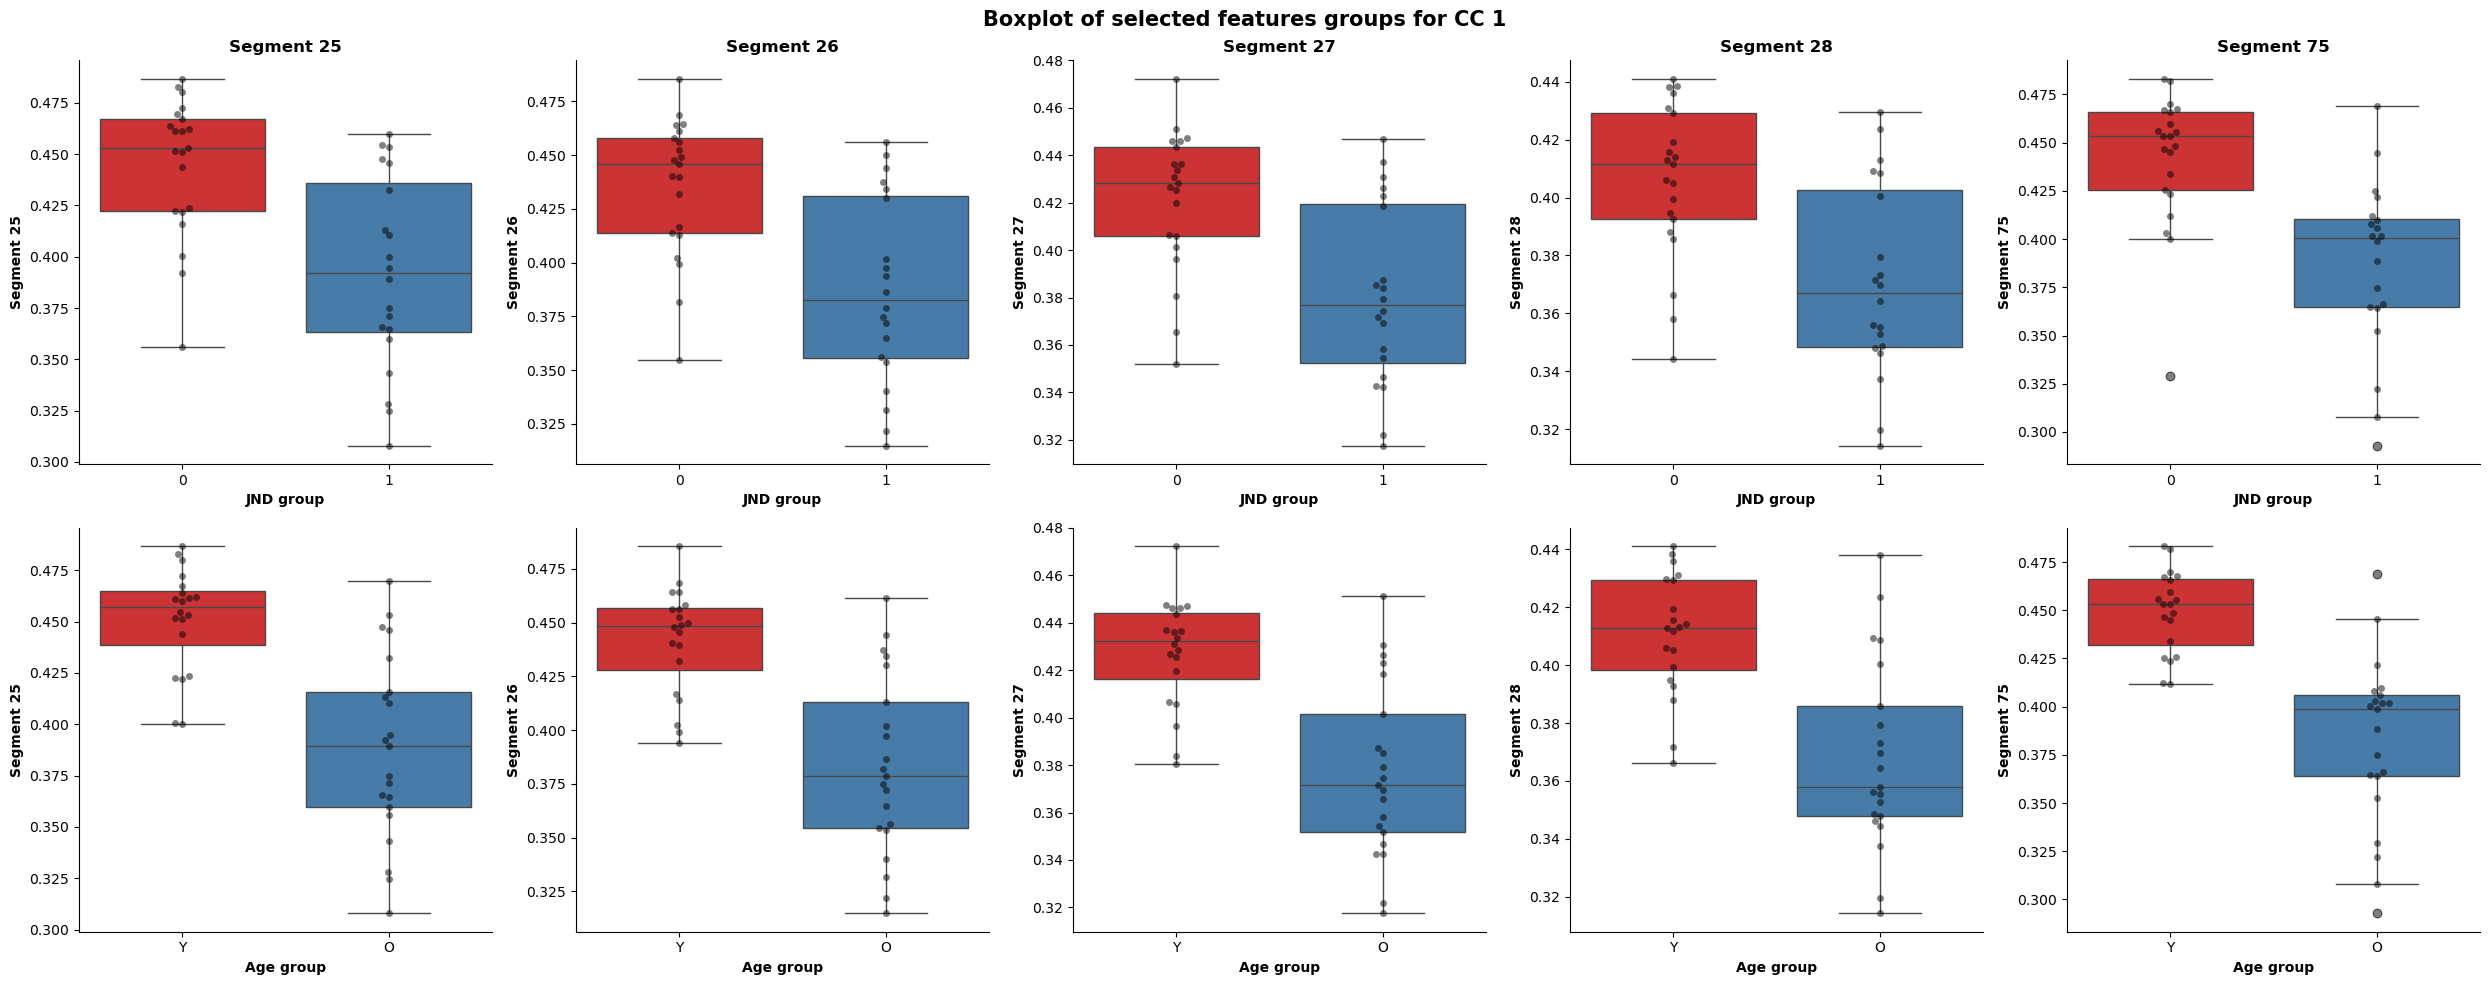

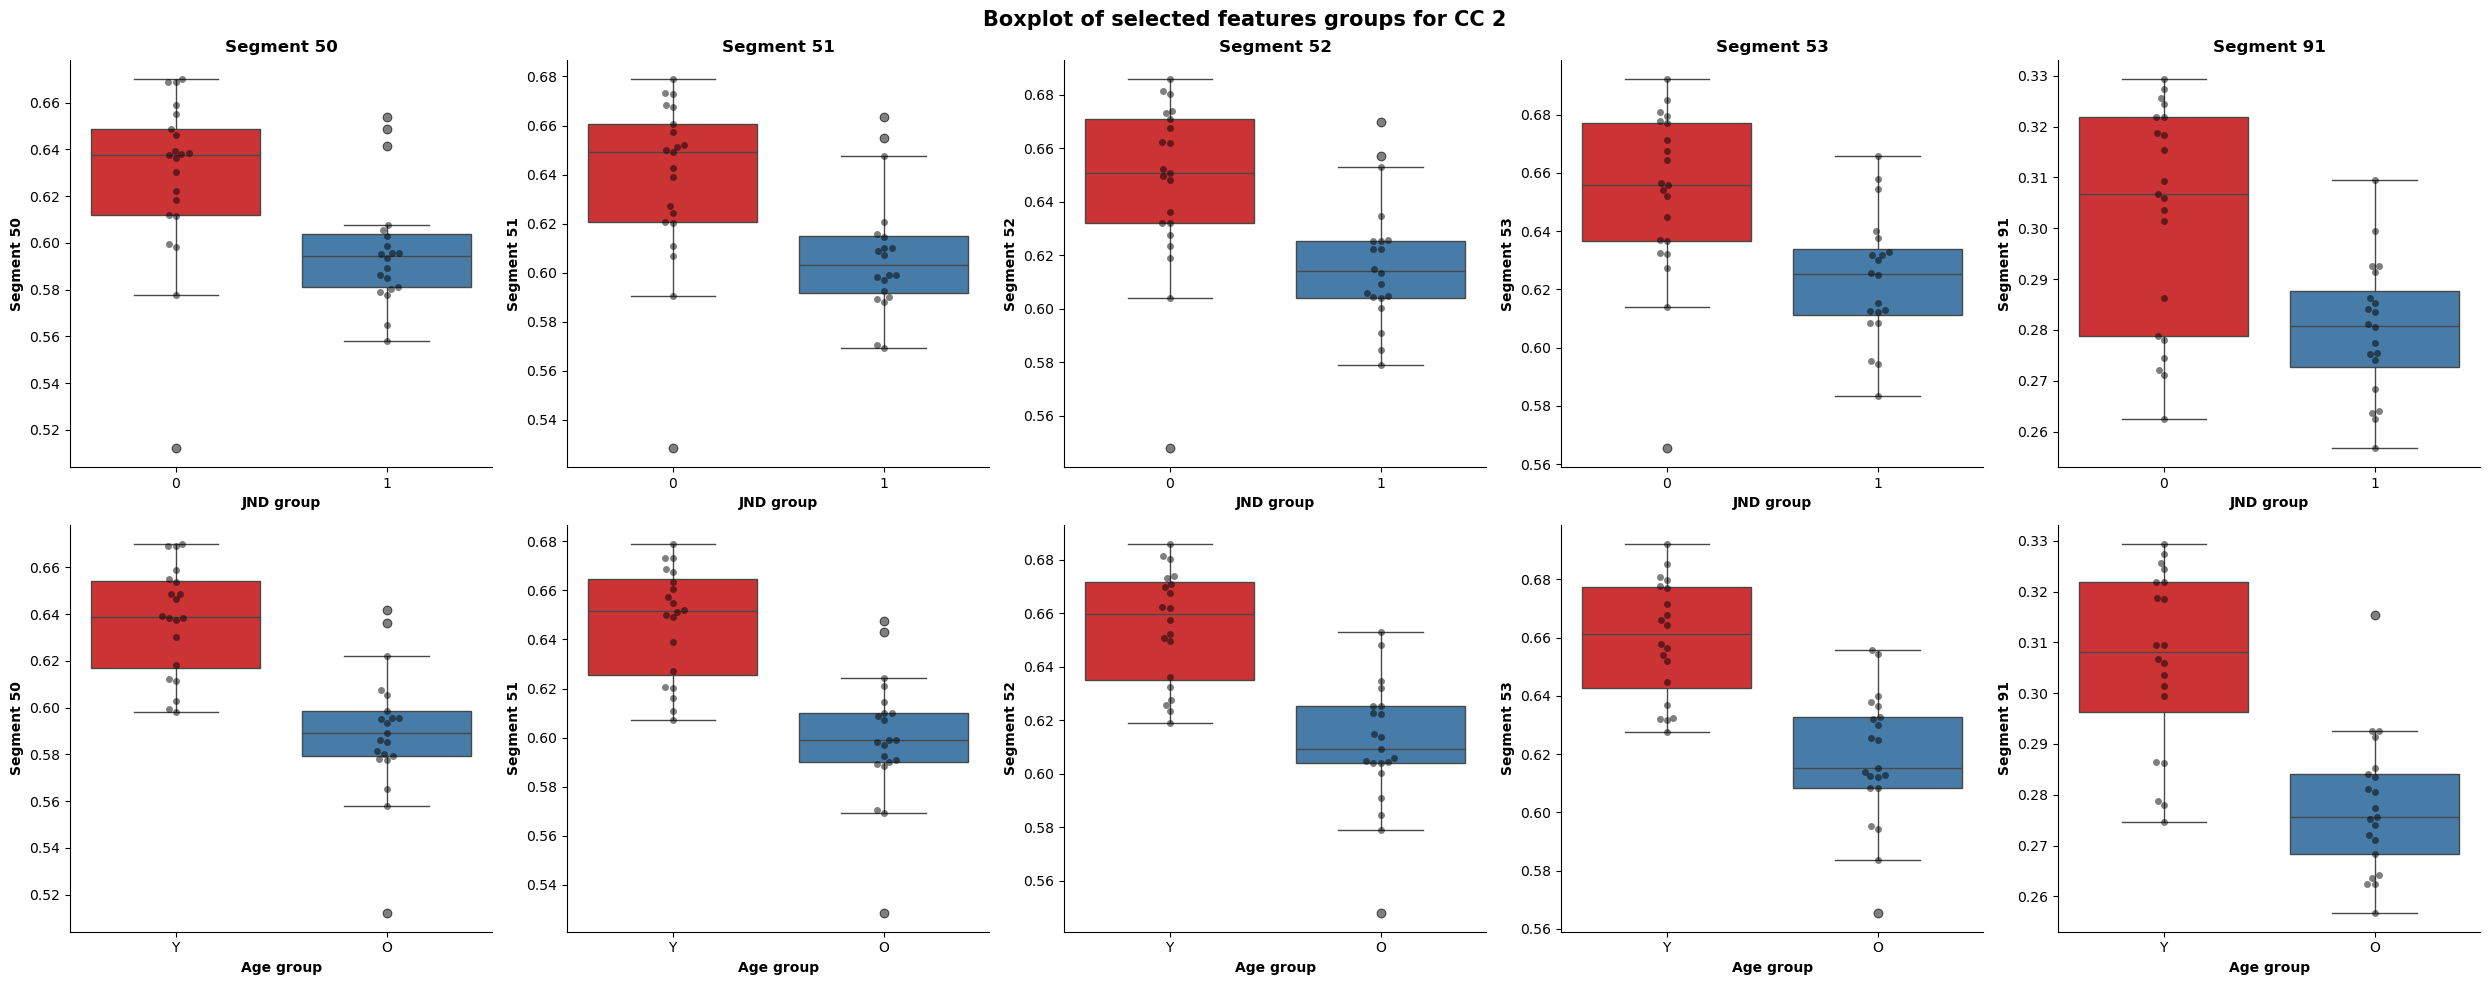

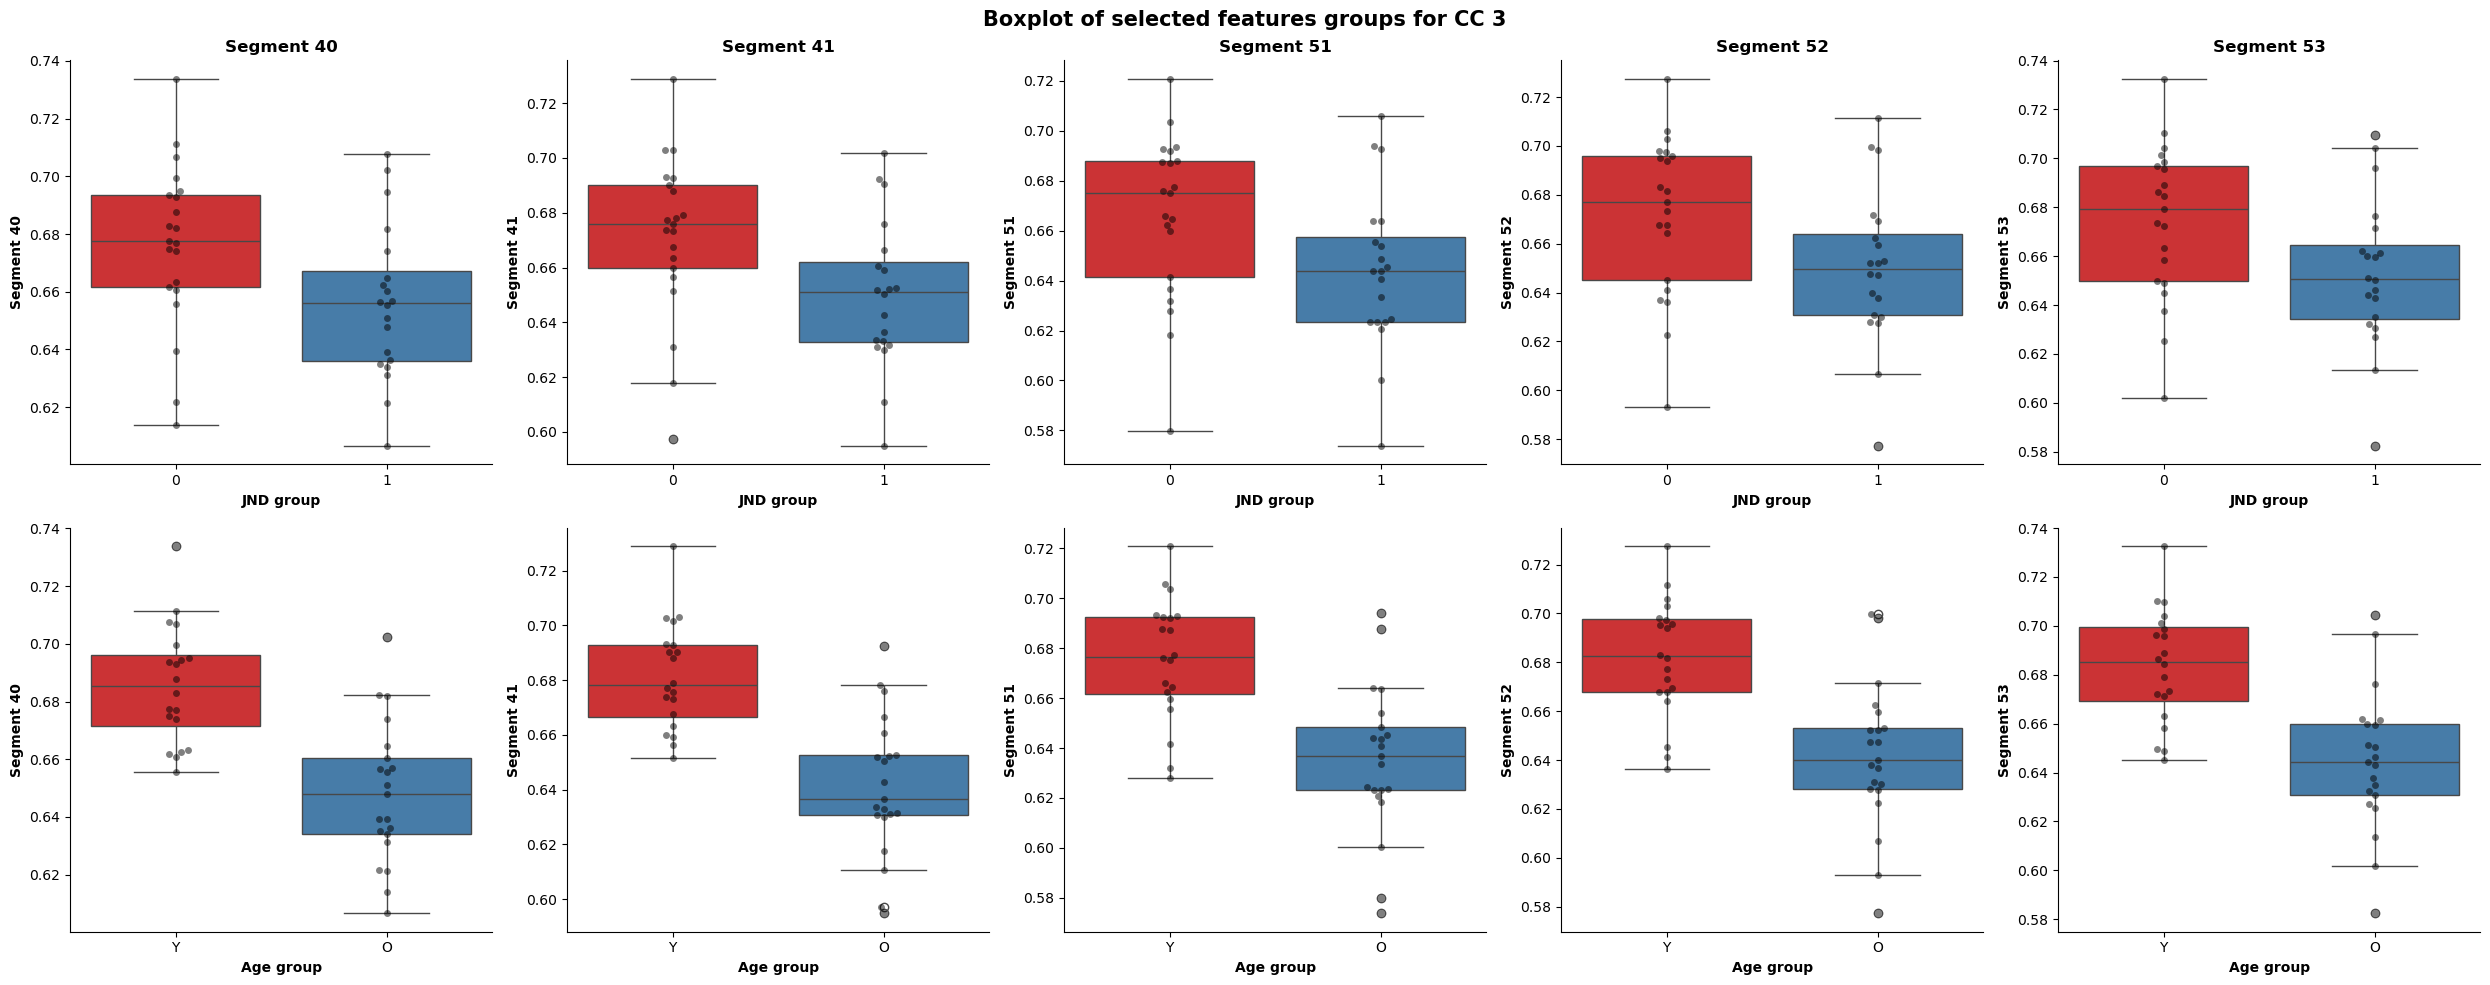

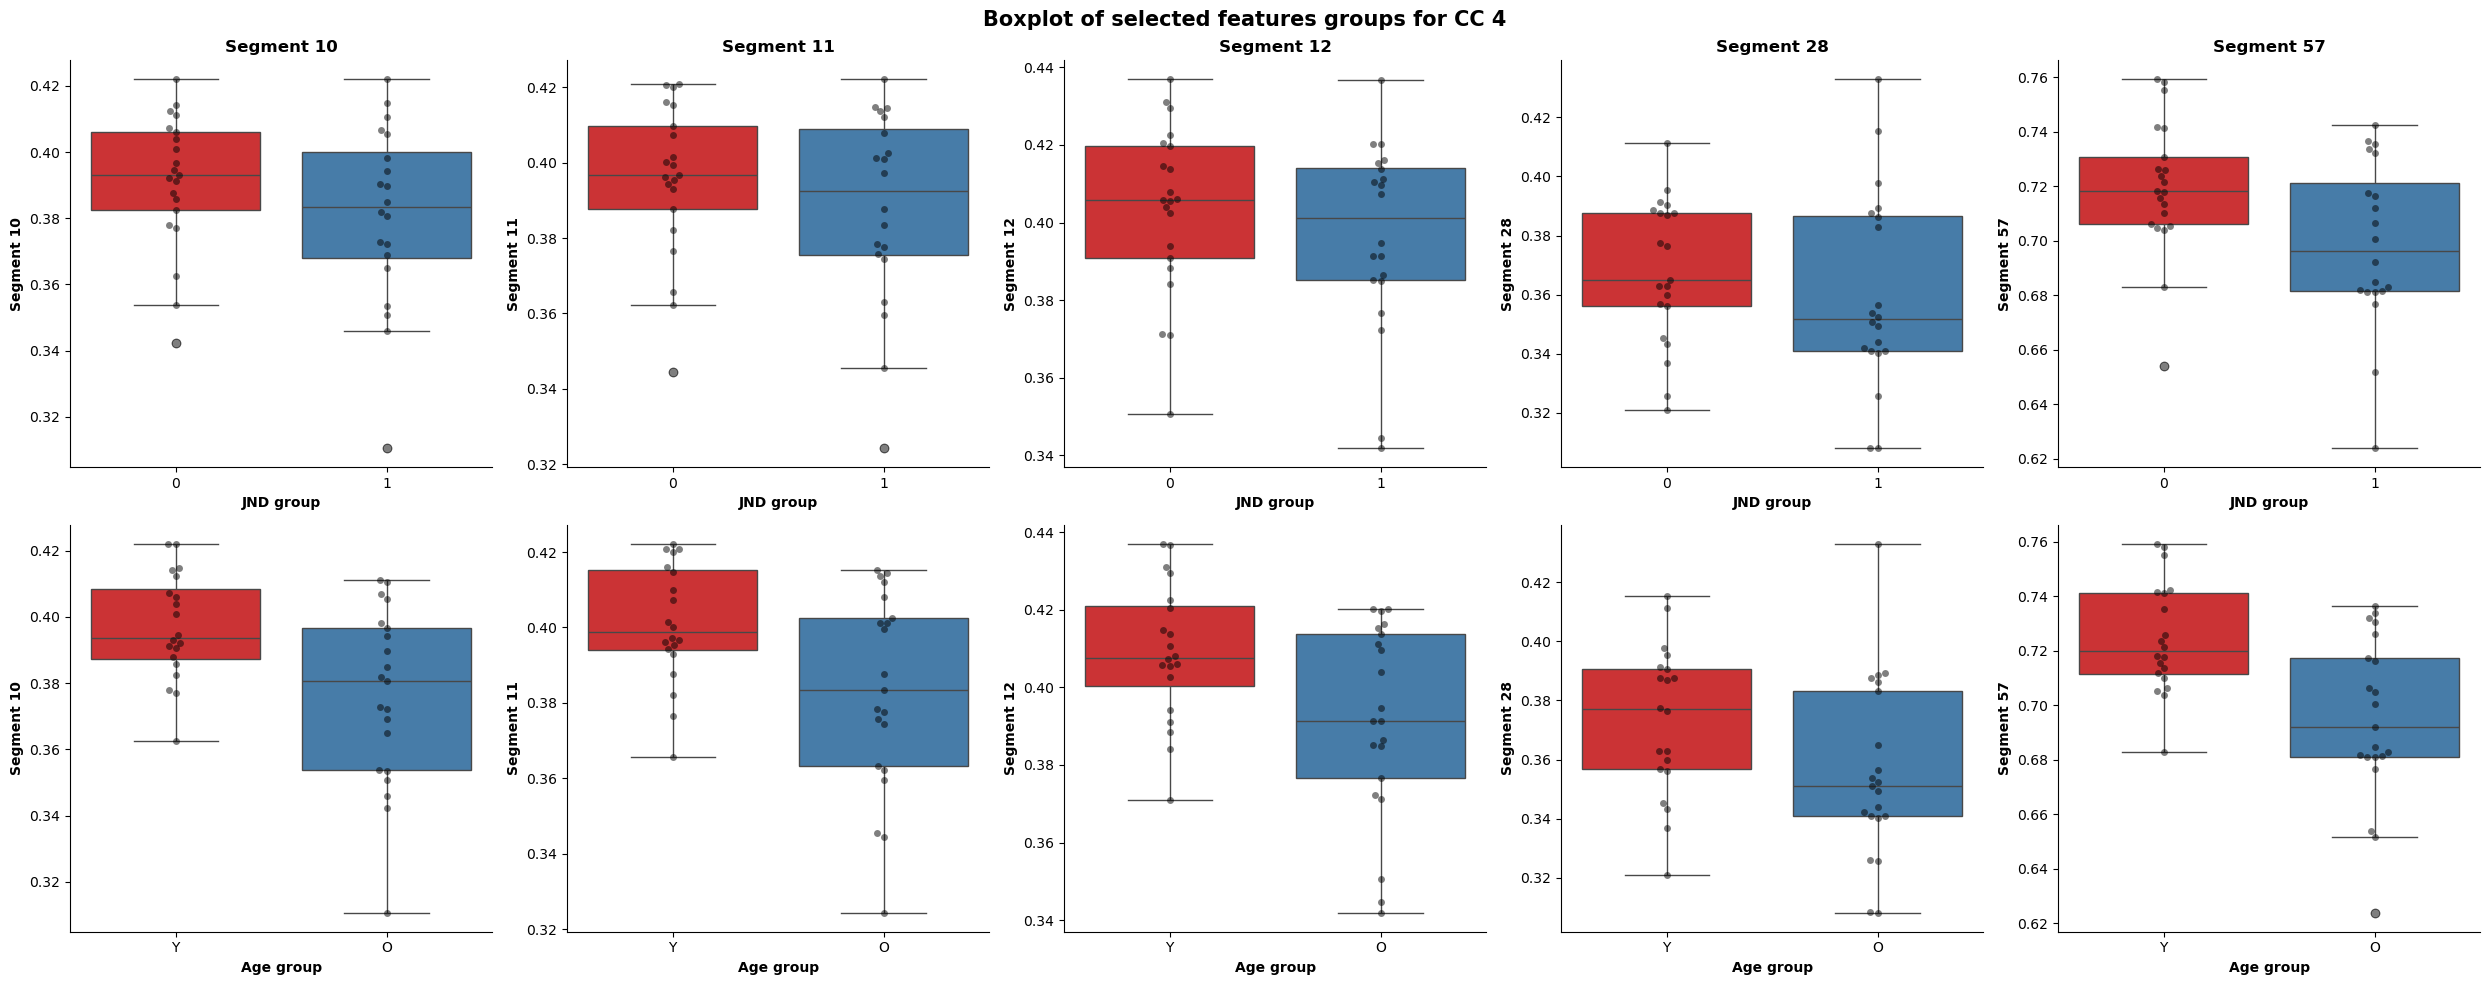

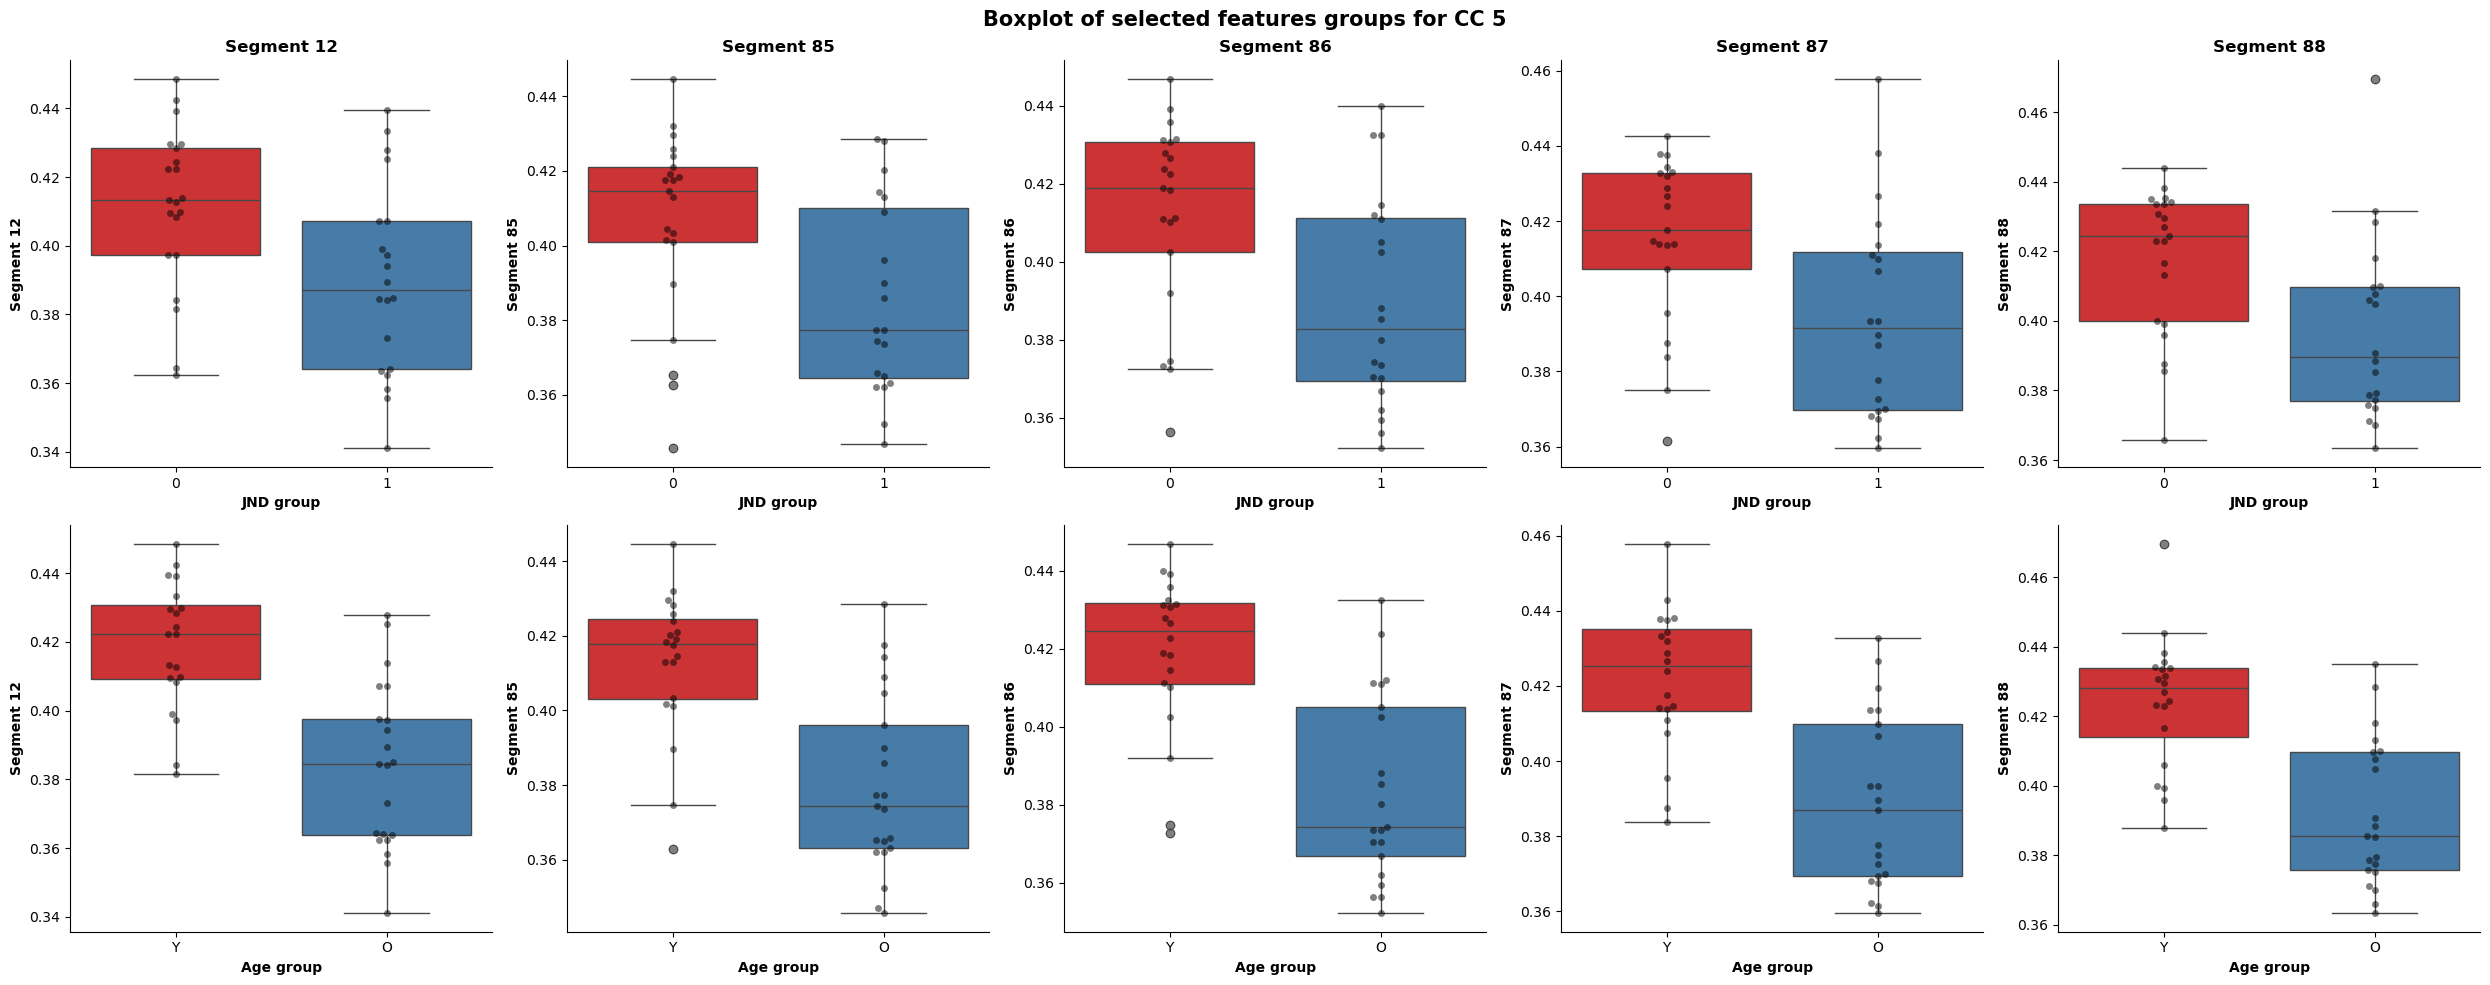

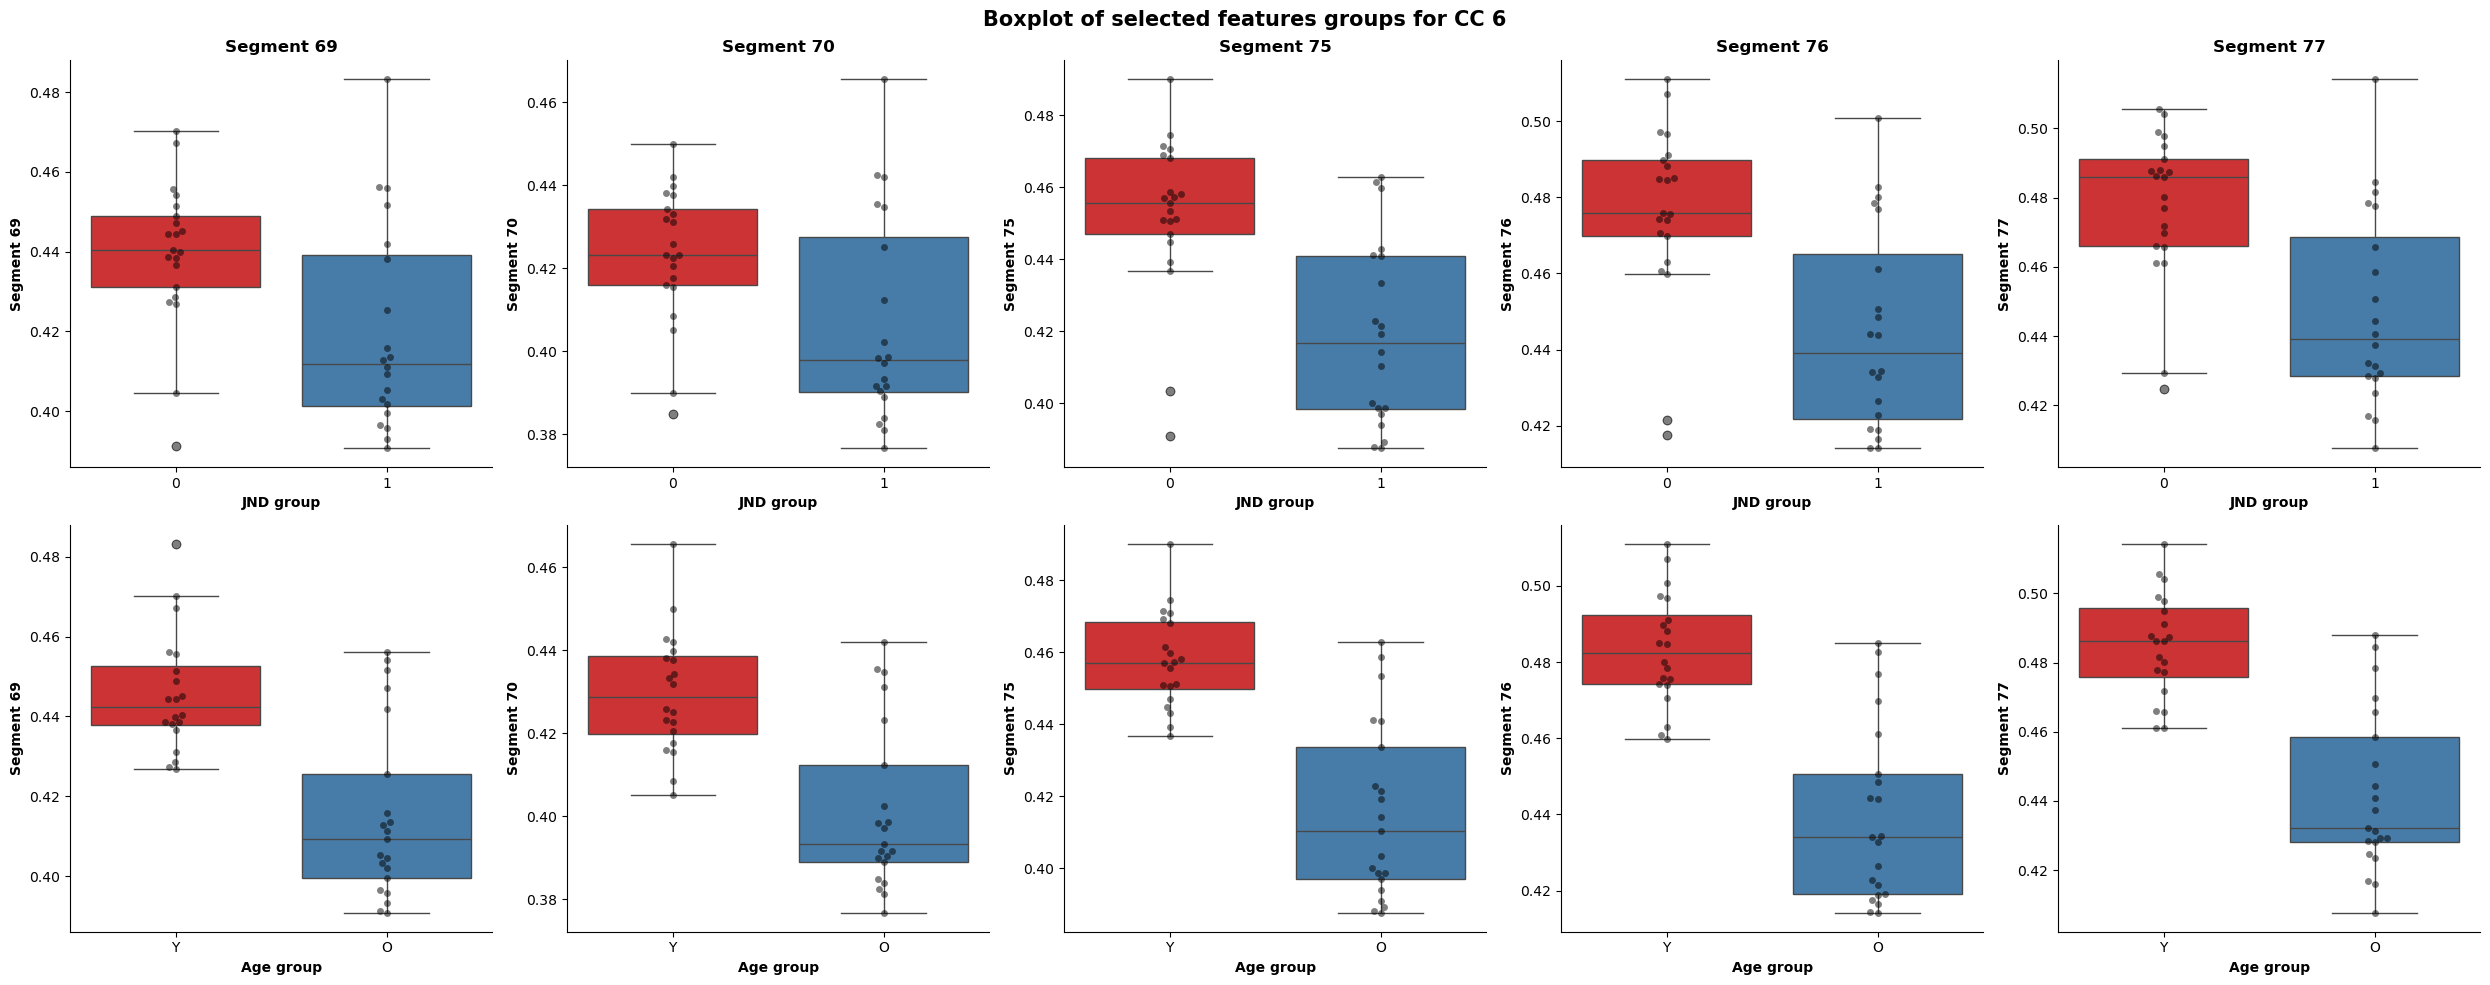

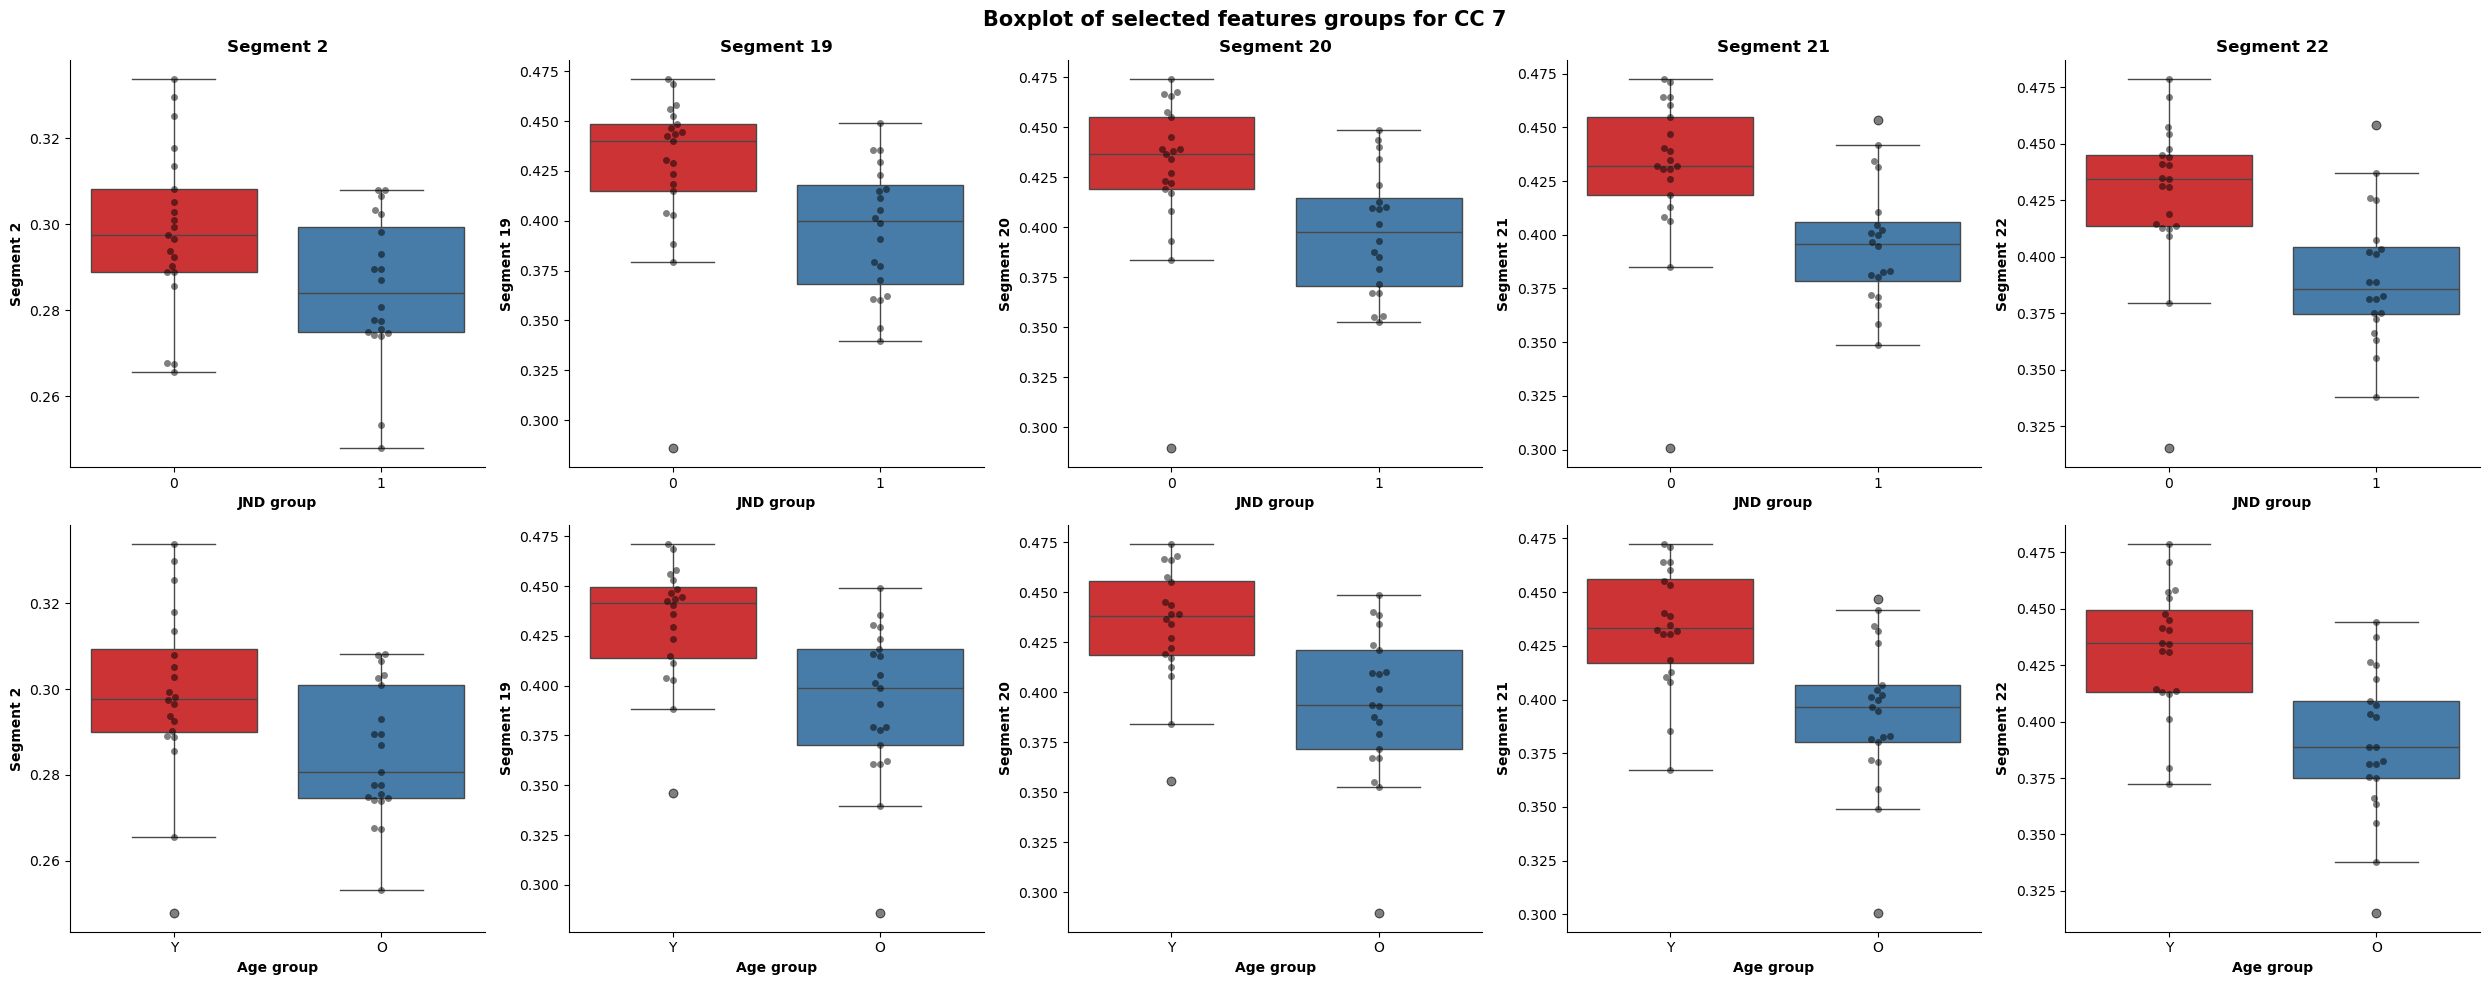

In [9]:


for CC in range(1,8):

    dataRaw=dataDTIallCC[CC-1]
    list_of_selfeatures=list_of_selfeaturesallCC[CC-1][nFeatures]
    data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)

    SelectedFeat=list_of_selfeatures


    fig, ax = plt.subplots(2, nFeatures, figsize=(25, 10))
    subpl=0


    for segment in SelectedFeat:
        ayid=0
        sns.boxplot(x='JND_group', y=segment, data=data,  ax=ax[ayid,subpl], palette='Set1')
        sns.swarmplot(x='JND_group', y=segment, data=data, color='black', alpha=0.5, ax=ax[ayid,subpl])
        ax[ayid,subpl].set_title('Segment ' + segment,weight='bold')
        ax[ayid,subpl].set_xlabel('JND group',weight='bold')
        ax[ayid,subpl].set_ylabel('Segment ' + str(segment),weight='bold')
        ax[ayid,subpl].spines['top'].set_visible(False)
        ax[ayid,subpl].spines['right'].set_visible(False)

        ayid=1
        sns.boxplot(x='group', y=segment, data=data,  ax=ax[ayid,subpl], palette='Set1')
        sns.swarmplot(x='group', y=segment, data=data, color='black', alpha=0.5, ax=ax[ayid,subpl])
        ax[ayid,subpl].set_xlabel('Age group',weight='bold')

        ax[ayid,subpl].set_ylabel('Segment ' + str(segment),weight='bold')
        ax[ayid,subpl].spines['top'].set_visible(False)
        ax[ayid,subpl].spines['right'].set_visible(False)
        subpl=subpl+1

    fig.suptitle('Boxplot of selected features groups for CC ' + str(CC), fontsize=15, fontweight='bold')
    plt.tight_layout()

    plt.savefig(os.path.join(pathsavefigure,'CC_' +str(CC)+'_nfeat_'+str(nFeatures)+' '+addtocc+'_figure3' '.pdf'), dpi=300, bbox_inches='tight')

    plt.show()



In [10]:
SubjectTable

,sub,age,JND_P,group_O,group_Y,group,sex,JND_group
0,1.0,25.0,9.5600,0.0,1.0,Y,F,1
1,2.0,27.0,6.6900,0.0,1.0,Y,M,0
2,3.0,28.0,12.9200,0.0,1.0,Y,F,1
3,5.0,21.0,1.9500,0.0,1.0,Y,F,0
4,6.0,25.0,2.5400,0.0,1.0,Y,F,0
5,8.0,67.0,4.4800,1.0,0.0,O,F,0
6,9.0,73.0,9.6300,1.0,0.0,O,M,1
7,10.0,64.0,7.2700,1.0,0.0,O,F,1
8,11.0,21.0,1.6200,0.0,1.0,Y,F,0
9,12.0,21.0,3.6800,0.0,1.0,Y,M,0


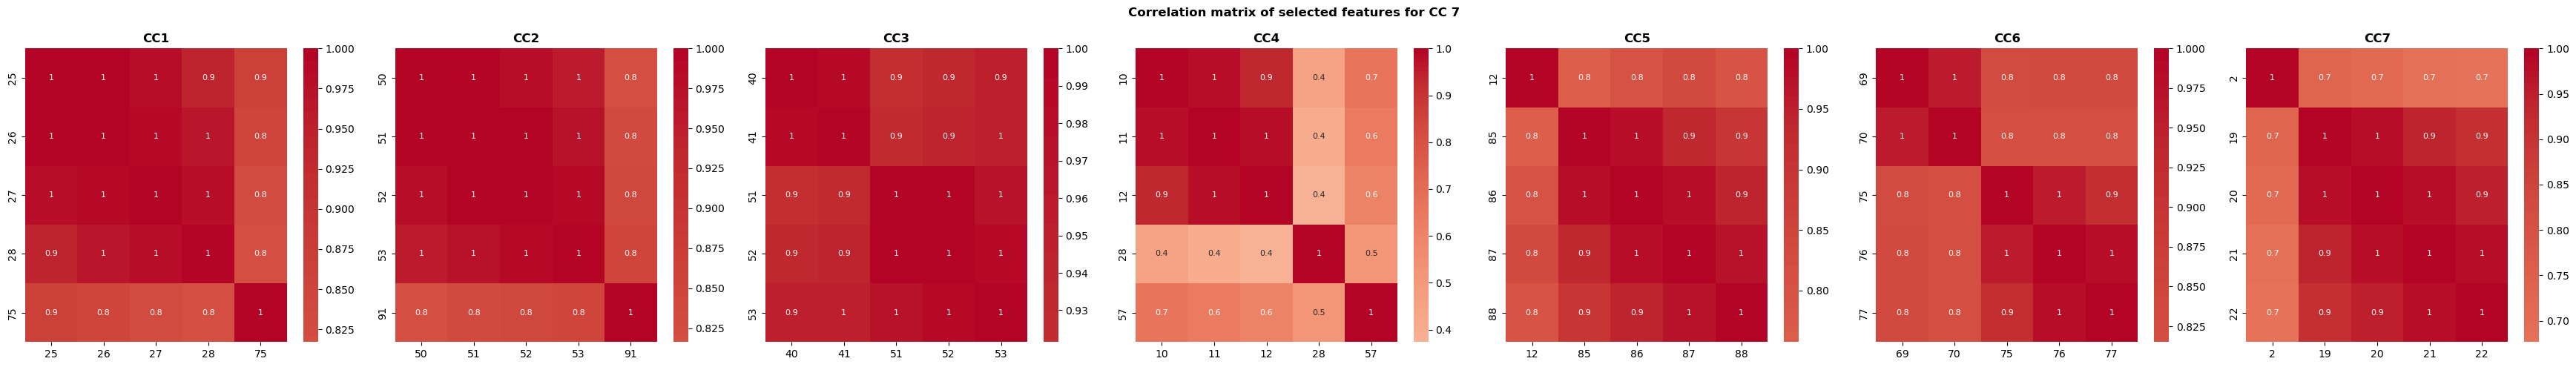

In [11]:
fig, axs = plt.subplots(1, 7, figsize=(35, 5))

for CC in range(1,8):

    dataRaw=dataDTIallCC[CC-1]
    list_of_selfeatures=list_of_selfeaturesallCC[CC-1][nFeatures]
    data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)
    dataCorrmat=data.drop(['sub','sex','age','group_O', 'group_Y', 'JND_group', 'group','JND_P'], axis=1)

    cont=dataCorrmat.columns
    corr_matrix=pd.DataFrame(dataCorrmat[cont],columns=cont).corr()


    sns.heatmap(corr_matrix,
            cmap='coolwarm',
            center=0,
            annot=True, annot_kws={'size': 8},
            fmt='.1g',ax=axs[CC-1])
    axs[CC-1].set_title('CC'+str(CC), fontsize=12, fontweight='bold')
    
fig.suptitle('Correlation matrix of selected features for CC '+str(CC),fontsize=12, fontweight='bold')

plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'CorrMat_CC'+'_nfeat_'+str(nFeatures)+addtocc+'_figure4.pdf'), dpi=300, bbox_inches='tight')



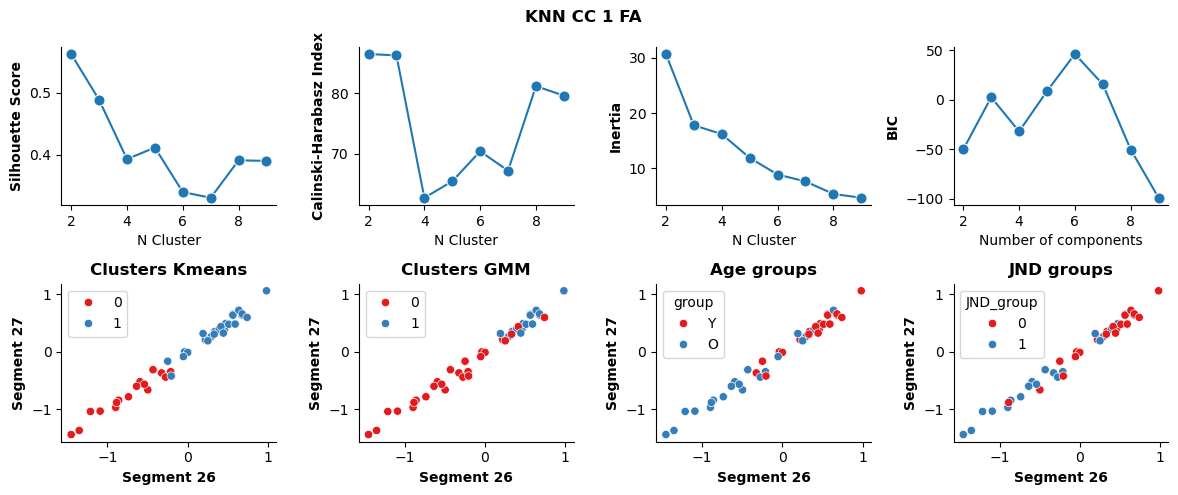

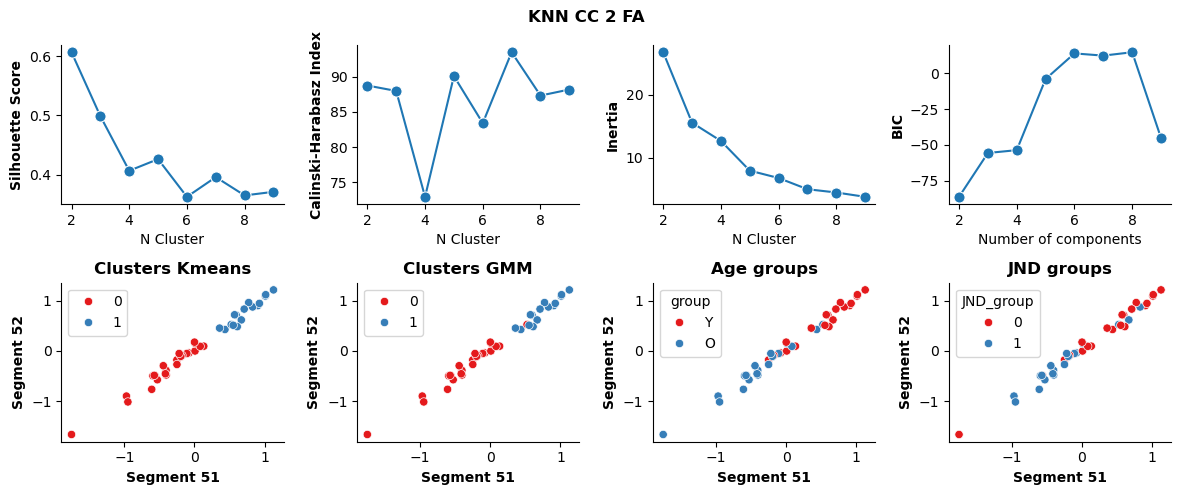

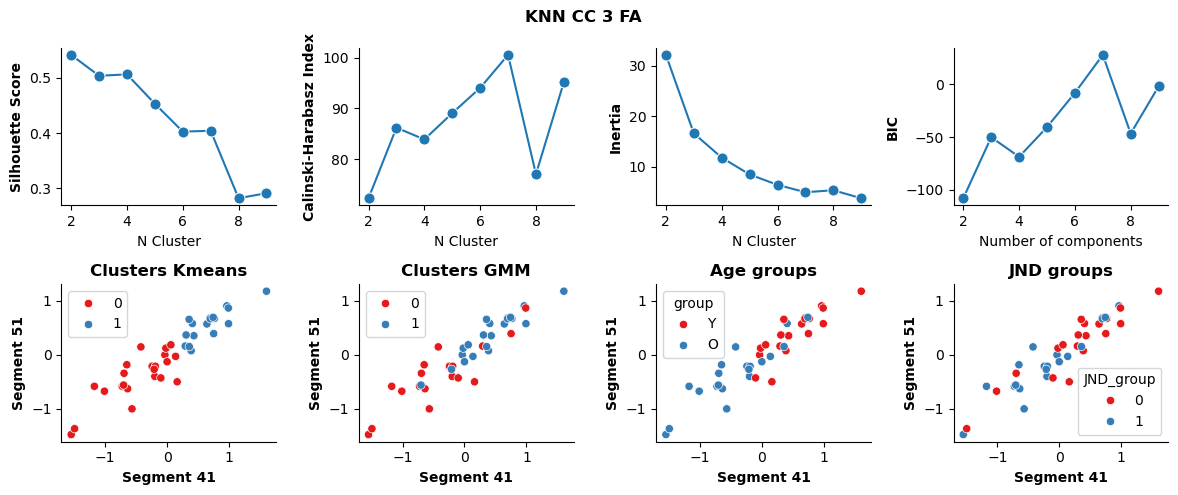

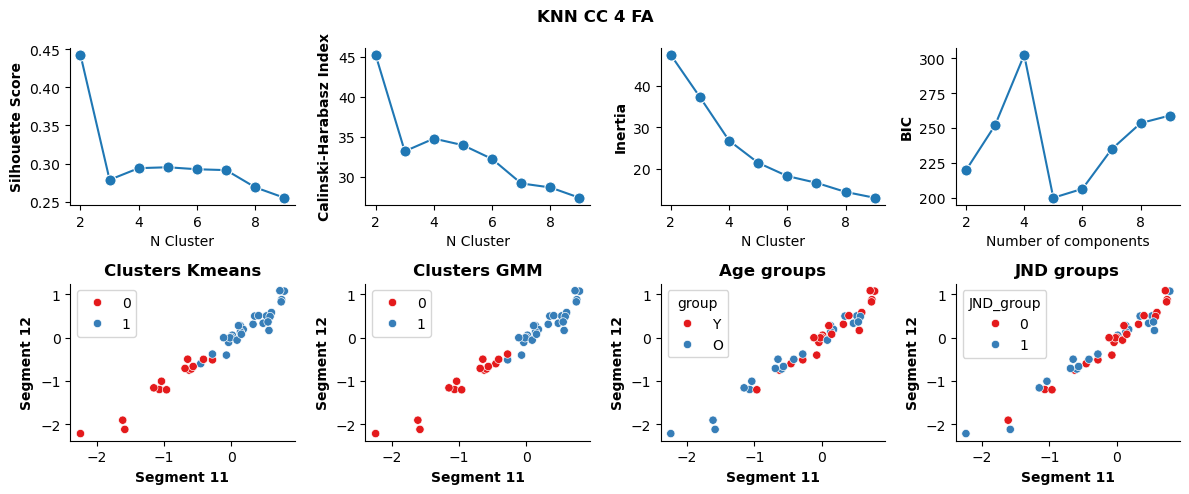

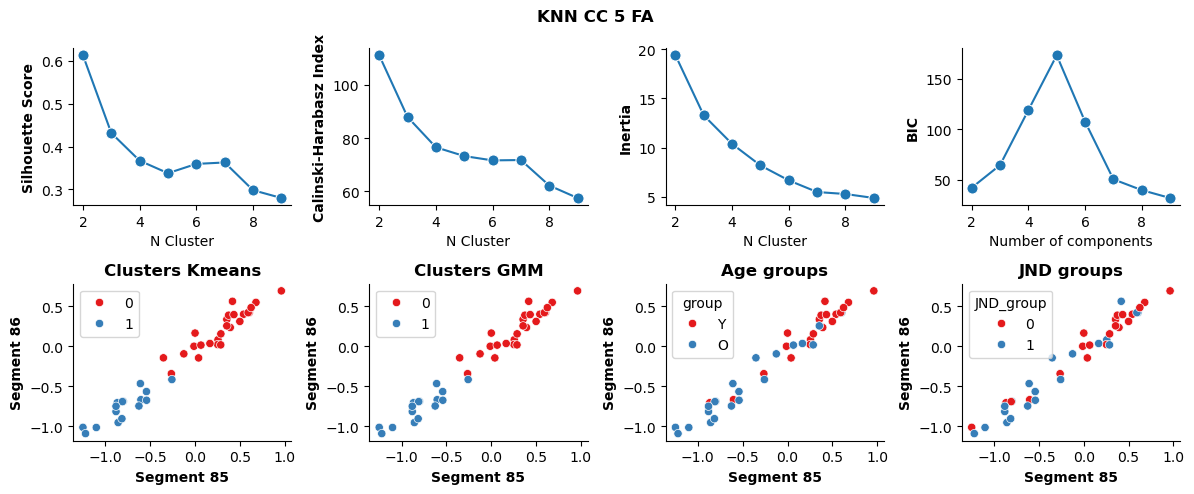

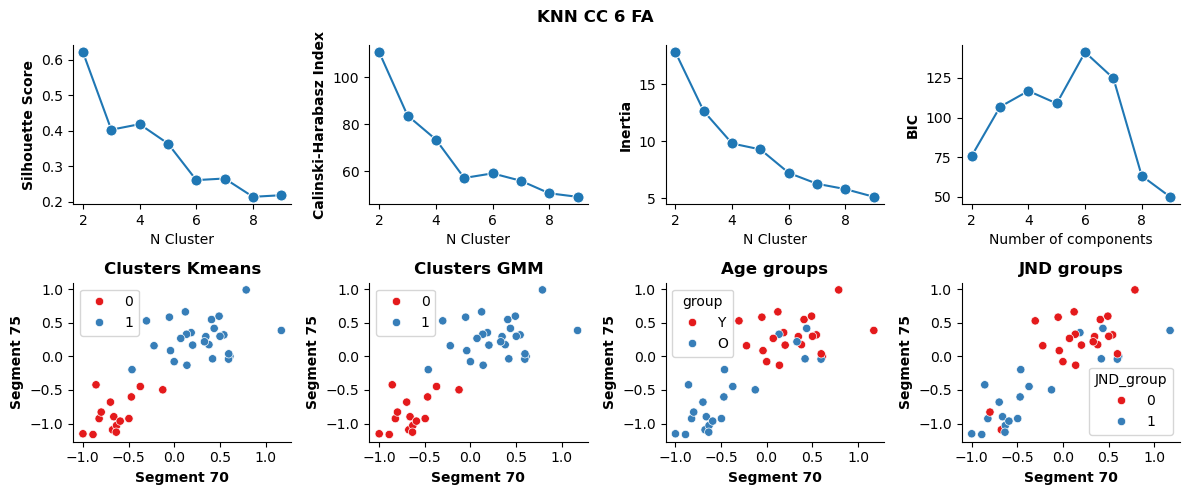

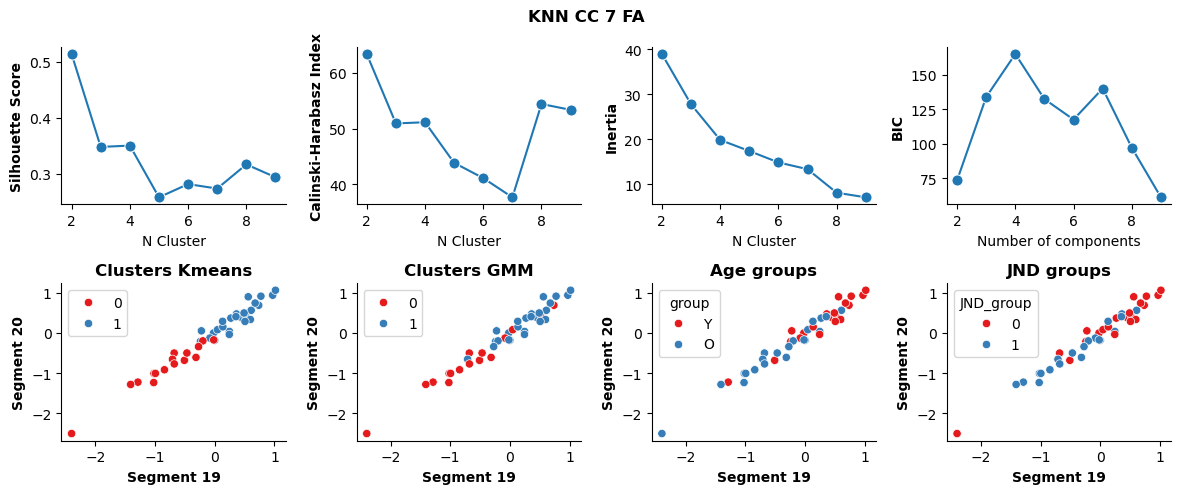

In [12]:

for CC in range(1,8):
    dataRaw=dataDTIallCC[CC-1]
    list_of_selfeatures=list_of_selfeaturesallCC[CC-1][nFeatures]
    data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)

    dataKmeans=data.drop(['sub','sex','age','group_O', 'group_Y', 'JND_group', 'group','JND_P'], axis=1)

    X=dataKmeans

    from sklearn.cluster import KMeans
    from sklearn.mixture import GaussianMixture
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import RobustScaler


    #SCALING using a StandardScaler
    scaler = StandardScaler()
    scaler=RobustScaler()
    Xscaled = scaler.fit_transform(X)
    Xscaled = pd.DataFrame(Xscaled, columns=X.columns)

    Xscaled.head()

    from sklearn.metrics import calinski_harabasz_score
    from sklearn.metrics import davies_bouldin_score
    from sklearn.metrics import silhouette_samples, silhouette_score

    SilScore=[]
    CalHar=[]
    bics = []
    inertia=[]

    for k in range(2,10):
        kmeans = KMeans(n_clusters=k, random_state=RandomState).fit(Xscaled)
        SilScore.append(silhouette_score(Xscaled, kmeans.fit_predict(Xscaled)))
        CalHar.append(calinski_harabasz_score(Xscaled, kmeans.labels_))
        inertia.append(kmeans.inertia_)  # Inertie (cohésion)

        gmm=GaussianMixture(n_components=k, random_state=RandomState).fit(Xscaled)
        bics.append(gmm.bic(Xscaled))

    K_range = range(2, 10)  
        
    df = pd.DataFrame({'Silhouette Score': SilScore,'Inertia': inertia,
                'Cal.-Har. Index': CalHar,'BIC': bics,'N Cluster': K_range})


    #KMEANS  
    kmeans = KMeans(n_clusters=nclust, random_state=RandomState,n_init="auto").fit(Xscaled)
    kmeans.labels_
    CenterCluster=kmeans.cluster_centers_
    labels_CC = kmeans.labels_
    data["cluster"]=labels_CC

    #GMM  
    gmm = GaussianMixture(n_components=nclust, random_state=RandomState).fit(Xscaled)
    labelsgmm_CC = gmm.predict(Xscaled)
    #data["clustergmm"]=labelsgmm_CC

    # PLOT CORRELATION MATRIX, CLUSTERS FOR A GIVEN CC (COMMON FOR ALL TARGET VAR)

    f1=list_of_selfeatures[1]
    f2=list_of_selfeatures[2]

    # PLOT  Evaluation CLUSTERS 

    fig, ax = plt.subplots(2, 4, figsize=(12, 5))

    axid=0
    ayid=0
    sns.lineplot(ax=ax[ayid,axid],data=df, y='Silhouette Score', x='N Cluster', marker='o',markersize=8)
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_ylabel('Silhouette Score',weight='bold')


    axid=1
    sns.lineplot(ax=ax[ayid,axid],data=df, x='N Cluster', y='Cal.-Har. Index', marker='o',markersize=8)
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_ylabel('Calinski-Harabasz Index',weight='bold')


    axid=2
    sns.lineplot(ax=ax[ayid,axid],data=df, x='N Cluster', y='Inertia', marker='o',markersize=8)
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_ylabel('Inertia',weight='bold')


    axid=3
    sns.lineplot(ax=ax[ayid,axid],data=df, x='N Cluster', y='BIC', marker='o',markersize=8)
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_xlabel('Number of components')
    ax[ayid,axid].set_ylabel('BIC',weight='bold')


    # PLOT 2D CLUSTERS

    #plot kmeans
    ayid=1
    axid=0
    sns.scatterplot(ax=ax[ayid,axid],data=Xscaled, x=f1, y=f2,hue=labels_CC,palette='Set1')
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_title('Clusters Kmeans', fontsize=12, fontweight='bold')
    ax[ayid,axid].set_ylabel('Segment ' + str(f2),weight='bold')
    ax[ayid,axid].set_xlabel('Segment ' + str(f1),weight='bold')

    #plot GMM
    axid=1
    sns.scatterplot(ax=ax[ayid,axid],data=Xscaled, x=f1, y=f2,hue=labelsgmm_CC,palette='Set1')
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_title('Clusters GMM', fontsize=12, fontweight='bold')
    ax[ayid,axid].set_ylabel('Segment ' + str(f2),weight='bold')
    ax[ayid,axid].set_xlabel('Segment ' + str(f1),weight='bold')

    axid=2
    sns.scatterplot(ax=ax[ayid,axid],data=Xscaled, x=f1, y=f2,hue=SubjectTable["group"],palette='Set1')
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_title('Age groups', fontsize=12, fontweight='bold')
    ax[ayid,axid].set_ylabel('Segment ' + str(f2),weight='bold')
    ax[ayid,axid].set_xlabel('Segment ' + str(f1),weight='bold')

    axid=3
    sns.scatterplot(ax=ax[ayid,axid],data=Xscaled, x=f1, y=f2,hue=SubjectTable["JND_group"],palette='Set1')
    ax[ayid,axid].spines[['right', 'top']].set_visible(False)
    ax[ayid,axid].set_title('JND groups', fontsize=12, fontweight='bold')
    ax[ayid,axid].set_ylabel('Segment ' + str(f2),weight='bold')
    ax[ayid,axid].set_xlabel('Segment ' + str(f1),weight='bold')


    fig.suptitle('KNN CC '+str(CC)+' '+dti_metric , fontsize=12, fontweight='bold')

    plt.tight_layout()


    plt.savefig(os.path.join(pathsavefigure,'Clustering_CC_' +str(CC)+'_nfeat_'+str(nFeatures)+addtocc+'_figure5.pdf'), dpi=300, bbox_inches='tight')








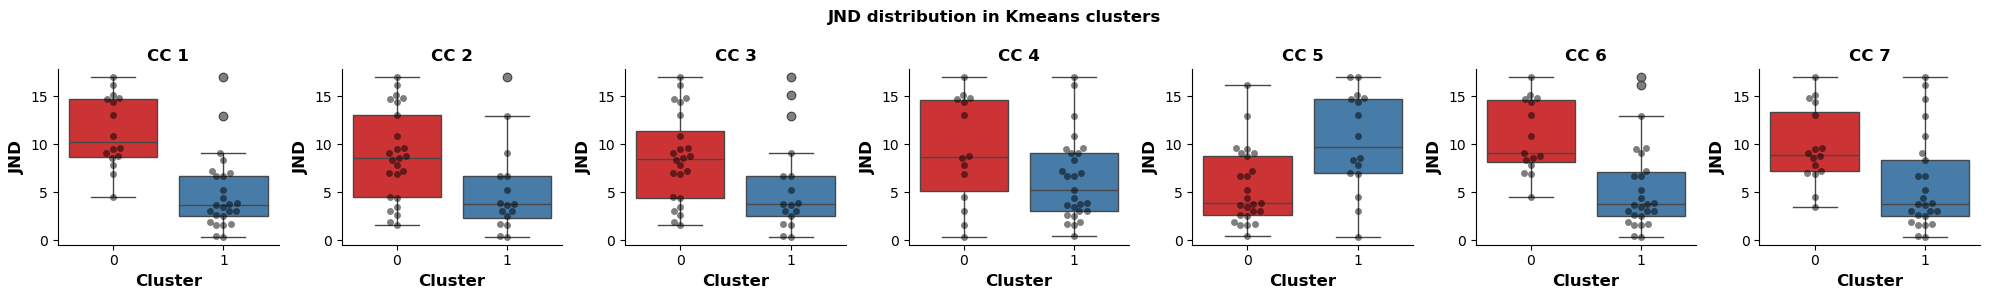

In [13]:
fig, axs = plt.subplots(1, 7, figsize=(20, 3))

for CC in range(1,8):
    dataRaw=dataDTIallCC[CC-1]
    list_of_selfeatures=list_of_selfeaturesallCC[CC-1][nFeatures]
    data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)

    dataKmeans=data.drop(['sub','sex','age','group_O', 'group_Y', 'JND_group', 'group','JND_P'], axis=1)

    X=dataKmeans

    #SCALING using a StandardScaler
    scaler = RobustScaler()
    Xscaled = scaler.fit_transform(X)
    Xscaled = pd.DataFrame(Xscaled, columns=X.columns)

    Xscaled.head()
     #KMEANS  
    kmeans = KMeans(n_clusters=nclust, random_state=RandomState,n_init="auto").fit(Xscaled)
    kmeans.labels_
    CenterCluster=kmeans.cluster_centers_
    labels_CC = kmeans.labels_
    data["cluster"]=labels_CC

    sns.boxplot(x='cluster', y='JND_P', data=data,  palette='Set1',ax=axs[CC-1])
    sns.swarmplot(x='cluster', y='JND_P', data=data, color='black', alpha=0.5,ax=axs[CC-1])
    axs[CC-1].set_title('CC '+str(CC), fontsize=12, fontweight='bold')
    axs[CC-1].set_xlabel('Cluster', fontsize=12, fontweight='bold')
    axs[CC-1].set_ylabel('JND', fontsize=12, fontweight='bold')
    axs[CC-1].spines['top'].set_visible(False)
    axs[CC-1].spines['right'].set_visible(False)
   
    fig.suptitle('JND distribution in Kmeans clusters', fontsize=12, fontweight='bold')

    plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'JND_Dsitrib_KmeansClustering' +'_nfeat_'+str(nFeatures)+addtocc+'_figure6.pdf'), dpi=300, bbox_inches='tight')


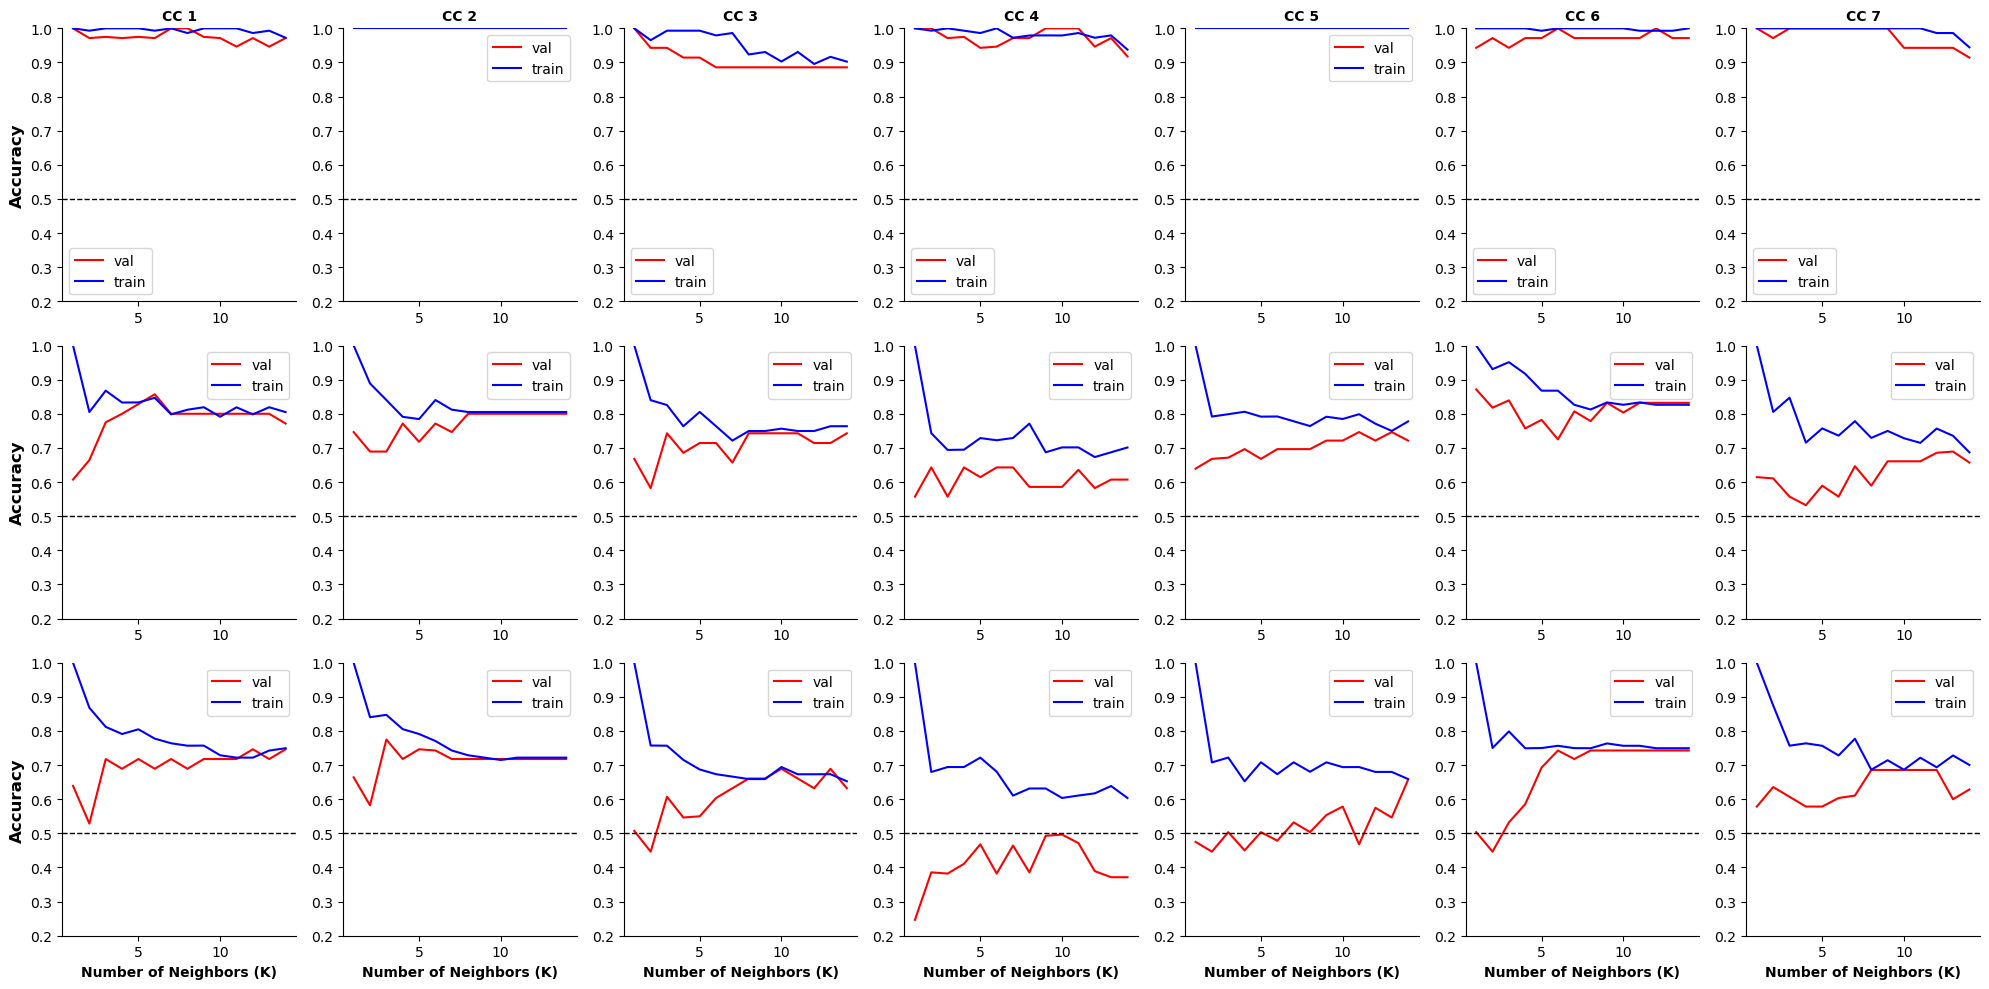

In [14]:

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, roc_auc_score)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

from sklearn.model_selection import GridSearchCV






fig, axs = plt.subplots(3,7, figsize=(20,10))
labels_all_CC=[]
for CC in range(0,7):


    dataRaw=dataDTIallCC[CC]
    list_of_selfeatures=list_of_selfeaturesallCC[CC][nFeatures]
    data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)

    dataKmeans=data.drop(['sub','sex','age','group_O', 'group_Y', 'JND_group', 'group','JND_P'], axis=1)

    ############################################
    X=dataKmeans
    scaler = RobustScaler()
    Xscaled = scaler.fit_transform(X)
    Xscaled = pd.DataFrame(Xscaled, columns=X.columns)

    #KMEANS  
    kmeans = KMeans(n_clusters=nclust,n_init="auto").fit(Xscaled)
    labels_CC = kmeans.labels_
    data["cluster"]=labels_CC

    labels_all_CC.append(labels_CC)

    for targetVar in [0,1,2]:

           #for targetVar in [0,1,2]:

        if targetVar==1:
            targetVarStr='Group'
            Y_group=data["group_Y"] 
            targetnames=['Y','O']
        elif targetVar==2:
            Y_group=data["JND_group"] 
            targetVarStr='JND'
            targetnames=['0','1']   
        elif targetVar==0:
            targetVarStr='Cluster'
            targetnames=['1','2']   
            Y_group=data["cluster"] 

        y=Y_group

        # split into inputs and outputs
        X, y = Xscaled.values, y

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=knn_test_size,random_state=0)
        cv=5
        # create model
        model=KNeighborsClassifier()
        k=np.arange(1,15)
        train_scores, val_score = validation_curve(model, X_train, y_train, param_name="n_neighbors", param_range=k, cv=cv)
        axs1= axs[targetVar,CC]
        axs1.plot(k,val_score.mean(axis=1),label='val',color='red')
        axs1.plot(k,train_scores.mean(axis=1),label='train',color='blue')
        axs1.axhline(y=0.5, color='k', linestyle='--', linewidth=1)
        
        axs1.legend()


        if targetVar==2:
            axs1.set_xlabel('Number of Neighbors (K)', fontsize=10, fontweight='bold')

        if targetVar==0:
            axs1.set_title('CC '+str(CC+1), fontsize=10, fontweight='bold')

        if CC==0:
            axs1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
        
        
        axs1.set_ylim(0.2,1)
        axs1.spines['top'].set_visible(False)
        axs1.spines['right'].set_visible(False)

plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'ValidationCurvesKNN' +'_nfeat_'+str(nFeatures)+addtocc+'_figure7.pdf'), dpi=300, bbox_inches='tight')



In [15]:
CM=np.zeros((2,2,3,7))
Scoreknnall=np.zeros((7,3))
Precisionknnall=np.zeros((7,3))
Recallknnall=np.zeros((7,3))
F1knnall=np.zeros((7,3))
RocAucScoreknnall=np.zeros((7,3))


for CC in range(1,8):
    print(CC)
    scoreknn=[]
    precisionknn=[]
    recallknn=[]
    f1knn=[]
    roc_auc_scoreknn=[]

    dataRaw=dataDTIallCC[CC-1]
    list_of_selfeatures=list_of_selfeaturesallCC[CC-1][nFeatures]
    data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)

    dataKmeans=data.drop(['sub','sex','age','group_O', 'group_Y', 'JND_group', 'group','JND_P'], axis=1)

    ############################################
    X=dataKmeans
    scaler = RobustScaler()
    Xscaled = scaler.fit_transform(X)
    Xscaled = pd.DataFrame(Xscaled, columns=X.columns)

    #KMEANS  
    kmeans = KMeans(n_clusters=nclust,n_init="auto").fit(Xscaled)
    labels_CC = kmeans.labels_
    data["cluster"]=labels_CC

    for targetVar in [0,1,2]:
        
        if targetVar==1:
            targetVarStr='Group'
            Y_group=data["group_Y"] 
            targetnames=['Y','O']
        elif targetVar==2:
            Y_group=data["JND_group"] 
            targetVarStr='JND'
            targetnames=['0','1']   
        elif targetVar==0:
            targetVarStr='Cluster'
            targetnames=['1','2']   
            Y_group=data["cluster"] 

        y=Y_group 

        # split into inputs and outputs
        X, y = Xscaled.values, y

        for i in range(50):
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=i)

                param_grid = {'n_neighbors': np.arange(1, 15)}
                model = KNeighborsClassifier()
                grid = GridSearchCV(model, param_grid, cv=5)
                grid.fit(X_train, y_train)
            
                bestmodel=grid.best_estimator_
                

                scoreknn.append(bestmodel.score(X_test, y_test))
                precisionknn.append(precision_score(y_test, bestmodel.predict(X_test), average='binary'))
                recallknn.append(recall_score(y_test, bestmodel.predict(X_test), average='binary'))
                f1knn.append(f1_score(y_test, bestmodel.predict(X_test), average='binary'))

                CM[:,:,targetVar,CC-1]=confusion_matrix(y_test, bestmodel.predict(X_test))+CM[:,:,targetVar,CC-1]



        
        Scoreknnall[CC-1,targetVar]=np.mean(scoreknn)
        Precisionknnall[CC-1,targetVar]=np.mean(precisionknn)
        Recallknnall[CC-1,targetVar]=np.mean(recallknn)
        F1knnall[CC-1,targetVar]=np.mean(f1knn)






1
2
3
4
5
6
7


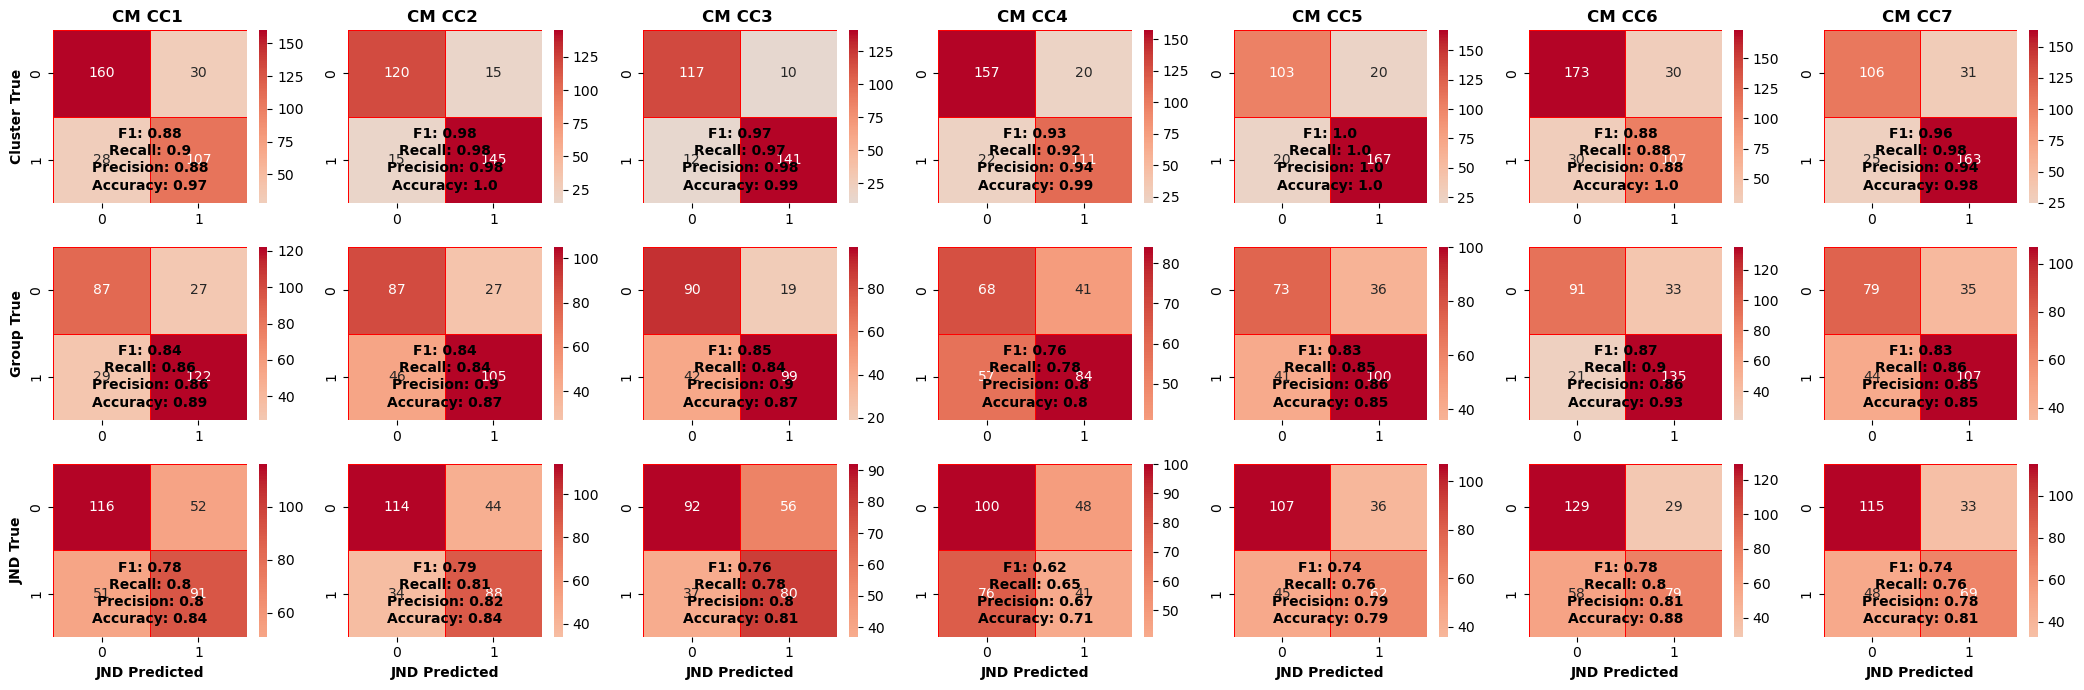

In [16]:
fig,ax = plt.subplots(3,7, figsize=(21,7))

for CC in range(1,8):

    for targetVar in [0,1,2]:
        
        targetVarStr=['Cluster','Group','JND']

        ax1=ax[targetVar,CC-1]
        sns.heatmap(CM[:,:,targetVar,CC-1],annot = True, linewidths= 0.5, linecolor="red", fmt=".0f",cmap='coolwarm',center=0,ax= ax1)

        if targetVar==0:
            ax1.set_title('CM CC' + str(CC)+' ',weight='bold')
        if targetVar==2:
            ax1.set_xlabel(targetVarStr[targetVar] + ' Predicted',weight='bold')
        if CC==1:
            ax1.set_ylabel(targetVarStr[targetVar] + ' True',weight='bold')
        ax1.text(0.5, 0.1, 'Accuracy: '+str(round(Scoreknnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold')
        ax1.text(0.5, 0.2, 'Precision: '+str(round(Precisionknnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold')
        ax1.text(0.5, 0.3, 'Recall: '+str(round(Recallknnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold')
        ax1.text(0.5, 0.4, 'F1: '+str(round(F1knnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold')

plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'ConfusionMatrix' +'_nfeat_'+str(nFeatures)+addtocc+'_figure8.pdf'), dpi=300, bbox_inches='tight')


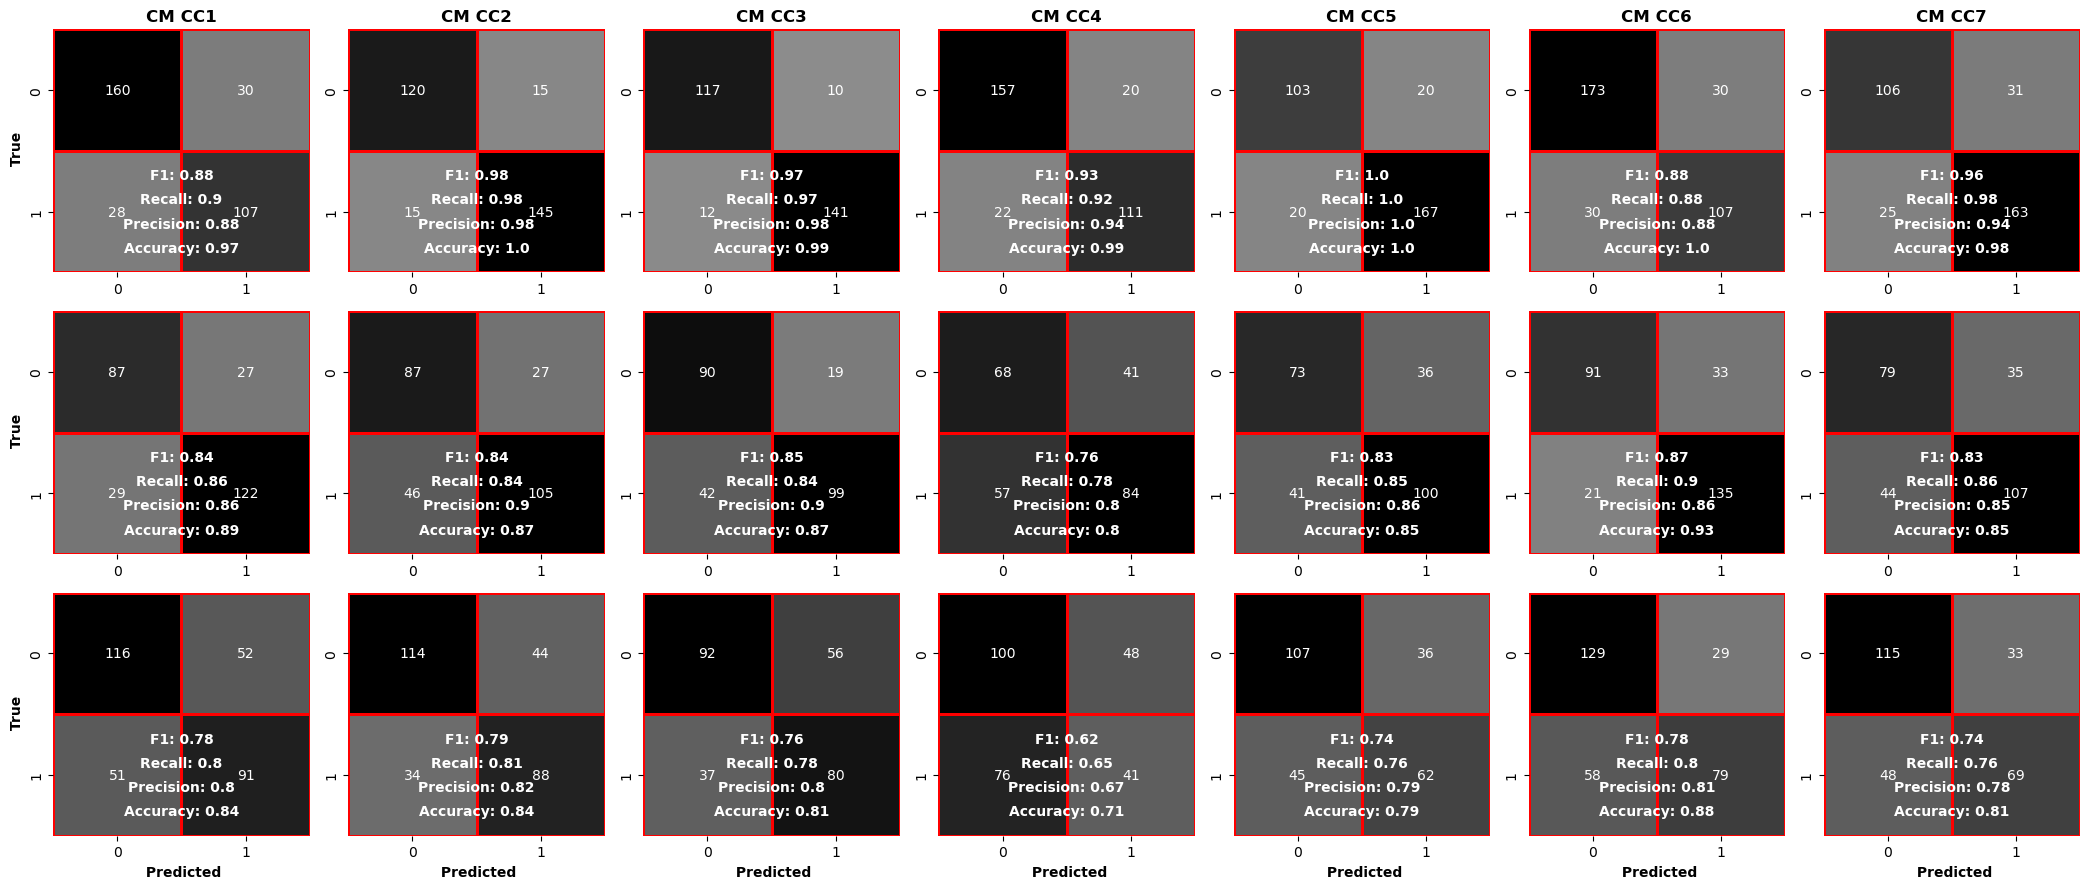

In [17]:

fig,ax = plt.subplots(3,7, figsize=(21,9))

for CC in range(1,8):

    for targetVar in [0,1,2]:
        targetVarStr=['Cluster','Group','JND']

        ax1=ax[targetVar,CC-1]
        sns.heatmap(CM[:,:,targetVar,CC-1],annot = True, linewidths= 1, linecolor="red", fmt=".0f",cmap='Greys',center=0,ax= ax1,cbar=False)
        
        if targetVar==0:
            ax1.set_title('CM CC' + str(CC),weight='bold')
        if targetVar==2:
            ax1.set_xlabel(' Predicted',weight='bold')
        if CC==1:
            ax1.set_ylabel(' True',weight='bold')

        ax1.text(0.5, 0.1, 'Accuracy: '+str(round(Scoreknnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold',color='white')
        ax1.text(0.5, 0.2, 'Precision: '+str(round(Precisionknnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold',color='white')
        ax1.text(0.5, 0.3, 'Recall: '+str(round(Recallknnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold',color='white')
        ax1.text(0.5, 0.4, 'F1: '+str(round(F1knnall[CC-1,targetVar],2)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes,weight='bold',color='white')

plt.tight_layout()

plt.savefig(os.path.join(pathsavefigure,'NEW_ConfusionMatrix' +'_nfeat_'+str(nFeatures)+addtocc+'_figure8.pdf'), dpi=300, bbox_inches='tight')


UMAP AND LEIDEN GRAPH

In [18]:
pip install umap-learn[plot]

Note: you may need to restart the kernel to use updated packages.


In [19]:
RAND_STATE = 42

def set_rand_state(RAND_STATE):
    np.random.seed(RAND_STATE)
    os.environ['PYTHONHASHSEED'] = str(RAND_STATE)
    random.seed(RAND_STATE)
    return None
    
def train_gridsearch_classifier(umap_df,test_size=0.3,num_CV=5,verbose=0):
    UMAP_X = np.stack(umap_df['waveform'].to_numpy().tolist(), axis=0)
    UMAP_y = umap_df['cluster_id'].to_numpy()
    UMAP_X_train, UMAP_X_test, UMAP_y_train, UMAP_y_test = train_test_split(UMAP_X,     UMAP_y, test_size=test_size, random_state=RAND_STATE)

    UMAP_model = xgb.XGBClassifier(objective='multi:softmax',verbosity=verbose)
    UMAP_param_dist = {"max_depth": [3,5,10],
                  "min_child_weight" : [1.0,2.5,5.0],
                  "n_estimators": [10,25,50,100,200],
                  "learning_rate": [0.1,0.3,0.5],
                  "seed": [RAND_STATE]}
    UMAP_grid_search = GridSearchCV(UMAP_model, param_grid=UMAP_param_dist,
                           cv = num_CV,
                           verbose=verbose, n_jobs=-1)
    UMAP_grid_search.fit(UMAP_X_train, UMAP_y_train)
    conf_mat = confusion_matrix(UMAP_y_test,UMAP_grid_search.predict(UMAP_X_test))
    return UMAP_grid_search, conf_mat
    
def plot_confusion_matrix(conf_mat,umap_df):
    n_clust = len(set(umap_df['cluster_id'].tolist()))

    confusion_mat_counts = conf_mat

    conf_mat_row_list = []

    for row in confusion_mat_counts:
        row_sum = np.sum(row)

        row_percent = []

        for val in row:
            row_percent.append(val/row_sum)

        conf_mat_row_list.append(row_percent)

    conf_mat = np.array(conf_mat_row_list)

    colormap = cm.YlGnBu
    colormap.set_under('white')

    eps = np.spacing(0.0)
    f, arr = plt.subplots(1,figsize=[5,5])
    mappable = arr.imshow(conf_mat,cmap=colormap,vmin=eps,vmax=1.)
    color_bar = f.colorbar(mappable, ax=arr, extend='min')
    color_bar.set_label('P (Predicted | True)',fontsize=12,labelpad=15,fontname="Arial")
    color_bar.ax.tick_params(size=3,labelsize=12)

    #Specify label behavior of the main diagonal
    for i in range(0,n_clust):
        if int(conf_mat[i,i]*100) == 100:
            arr.text(i-0.38,i+0.17,int(round(conf_mat[i,i]*100)),fontsize=10,c='white',fontname="Arial")
        else:
            arr.text(i-0.34,i+0.16,int(round(conf_mat[i,i]*100)),fontsize=10,c='white',fontname="Arial")

    #Specify label behavior of the off-diagonals
    for i in range(0,n_clust):
        for j in range(0,n_clust):
            if conf_mat[i,j] < 0.1 and conf_mat[i,j] != 0:
                arr.text(j-0.2,i+0.15,int(round(conf_mat[i,j]*100)),fontsize=10,c='k',fontname="Arial")
            elif conf_mat[i,j] >= 0.1 and conf_mat[i,j] < 0.5 and conf_mat[i,j] != 0:
                arr.text(j-0.4, i+0.15,int(round(conf_mat[i,j]*100)),fontsize=10,c='k',fontname="Arial")

    arr.set_xticks(range(0,n_clust))
    arr.set_xticklabels(range(1,n_clust+1),fontsize=12);
    arr.set_yticks(range(0,n_clust))
    arr.set_yticklabels(range(1,n_clust+1),fontsize=12);
    arr.set_xlabel('Predicted Class',fontsize=12);
    arr.set_ylabel('True Class',fontsize=12);
    plt.tight_layout()
    
    return None
    
#def plot_SHAP_values(UMAP_grid_search,umap_df):
#
#    return None

def plot_inverse_mapping(reducer,umap_df):
    def find_nearest_color(embedding, test_coord, umap_df, threshold_dist=0.8):
        x_array, y_array = embedding[:,0], embedding[:,1]
        
        # Take coordinates of test point to calculate an array of each point's distance to test then return index
        # where the minimum value is found
        dist_array = np.array(np.abs(x_array-test_coord[0])+np.abs(y_array-test_coord[1]))
        idx = dist_array.argmin()
        
        if dist_array[idx] <= threshold_dist:
            return umap_df['cluster_color'][idx]
        
        else:
            return (0.8,0.8,0.8)
    
    corners = np.array([
    [reducer.embedding_[:,0].min(), reducer.embedding_[:,1].max()],  # top-left
    [reducer.embedding_[:,0].max(), reducer.embedding_[:,1].max()],  # top-right
    [reducer.embedding_[:,0].min(), reducer.embedding_[:,1].min()],  # bottom-left
    [reducer.embedding_[:,0].max(), reducer.embedding_[:,1].min()],  # bottom-right
    ])
    
    test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)])
    
    fig = plt.figure(figsize=(4.5,7))
    gs = GridSpec(20, 10, fig)
    gs.update(wspace=0.05, hspace=0.05)
    scatter_ax = fig.add_subplot(gs[:10, :10])
    waveform_axes = np.zeros((10, 10), dtype=object)
    inv_transformed_points = reducer.inverse_transform(test_pts)
    for i in range(10):
        for j in range(10):
            waveform_axes[i, j] = fig.add_subplot(gs[10+ i,j])

    scatter_ax.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1],
                    c=umap_df['cluster_color'], s=30,linewidth=0.25,edgecolor='white',zorder=1)
    scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x',
                       c='k',
                       s=30, zorder=2, alpha=1)

    # Plot each of the generated waveforms
    for i in range(10):
        for j in range(10):
            waveform_axes[i, j].plot(inv_transformed_points[i*10 + j],
                                         c = find_nearest_color(reducer.embedding_,
                                                                test_pts[i*10 + j],umap_df),
                                    linewidth=1.0)

            waveform_axes[i, j].set(xticks=[], yticks=[])
            waveform_axes[i, j].spines['right'].set_visible(False)
            waveform_axes[i, j].spines['top'].set_visible(False)
            waveform_axes[i, j].spines['left'].set_visible(False)
            waveform_axes[i, j].spines['bottom'].set_visible(False)

    scatter_ax.set(xticks=[], yticks=[])
    scatter_ax.spines['right'].set_visible(False)
    scatter_ax.spines['top'].set_visible(False)
    scatter_ax.spines['left'].set_visible(False)
    scatter_ax.spines['bottom'].set_visible(False)
    
    return None

def plot_shap_summary(explainer,umap_df,colors):
    shap_values = explainer.shap_values(umap_df['waveform'].tolist())
    class_inds = np.argsort([-np.abs(shap_values[i]).mean() for i in range(len(shap_values))])
    shap_cmap = ListedColormap(np.array(colors)[class_inds])
    shap.summary_plot(shap_values,color=shap_cmap)

    return None

In [20]:

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sknetwork.clustering import Louvain, get_modularity
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import visualize_graph, visualize_bigraph
from IPython.display import SVG
from scipy import sparse

import umap.plot
from umap import umap_ as umap
from sklearn.metrics import silhouette_score
import seaborn as sns
from sknetwork.clustering import Leiden
import warnings
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import networkx as nx
#import cylouvain
from matplotlib import cm
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import xgboost as xgb



2025-09-05 11:54:25.966735: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-05 11:54:26.050727: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757066066.085324    8981 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757066066.096516    8981 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757066066.165228    8981 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [21]:
CC=6

print(CC)
scoreknn=[]
precisionknn=[]
recallknn=[]
f1knn=[]
roc_auc_scoreknn=[]

dataRaw=dataDTIallCC[CC-1]
list_of_selfeatures=list_of_selfeaturesallCC[CC-1][nFeatures]
data=pd.concat([dataRaw.loc[:,list_of_selfeatures], SubjectTable], axis=1)

dataKmeans=data.drop(['sub','sex','age','group_O', 'group_Y', 'JND_group', 'group','JND_P'], axis=1)

############################################
X=dataKmeans
scaler = RobustScaler()
Xscaled = scaler.fit_transform(X)
Xscaled = pd.DataFrame(Xscaled, columns=X.columns)

#KMEANS  
kmeans = KMeans(n_clusters=nclust,n_init="auto").fit(Xscaled)
labels_CC = kmeans.labels_
data["cluster"]=labels_CC

labels_all_CC.append(labels_CC)

# for targetVar in [0,1,2]:

targetVar=2

if targetVar==1:
    targetVarStr='Group'
    Y_group=data["group_Y"] 
    targetnames=['Y','O']
elif targetVar==2:
    Y_group=data["JND_group"] 
    targetVarStr='JND'
    targetnames=['0','1']   
elif targetVar==0:
    targetVarStr='Cluster'
    targetnames=['1','2']   
    Y_group=data["cluster"] 

y=Y_group


SilScore =[]
Modularity_score = []
Resolution_leiden = []
nb_neighbors = []
nb_clusters = []

# for i in n_neigbors:
n_neigbors=10
reducer = umap.UMAP(n_neighbors=n_neigbors)
embedding = reducer.fit_transform(Xscaled)
mapper = reducer.fit(Xscaled)
toto=mapper.graph_.toarray()
umap_df = pd.DataFrame(embedding, columns=('x', 'y'))

adjacency = sparse.csr_matrix(toto)
# name nodes by indices
n_nodes, _ = adjacency.shape
names = np.arange(n_nodes)
SVG(visualize_graph(adjacency, names=names))


for n_resolution in np.arange(0.5,3,0.5):
        
        leiden = Leiden(resolution=n_resolution)

        labels = leiden.fit_predict(adjacency)
        score = silhouette_score(Xscaled, leiden.fit_predict(adjacency))
        modularity=get_modularity(adjacency, labels)
        SilScore.append(score)

        umap_df['cluster_id_n='+str(i)+'_r='+str(n_resolution)] = labels

        cmap = plt.get_cmap("turbo")
        colors = cmap(np.linspace(0, 1, len(set(labels))))
        umap_df['cluster_color'] = [colors[i] for i in labels]

        nb_neighbors.append(i)
        nb_clusters.append(np.max(labels)+1)
        Modularity_score.append(modularity)
        Resolution_leiden.append(n_resolution)

umap_parameters = pd.DataFrame({'n_neighbors':nb_neighbors,
                               'resolution':Resolution_leiden,
                               'n_clusters':nb_clusters,
                               'modularity':Modularity_score,
                               'silhouette_score':SilScore})



6


NameError: name 'voisin' is not defined

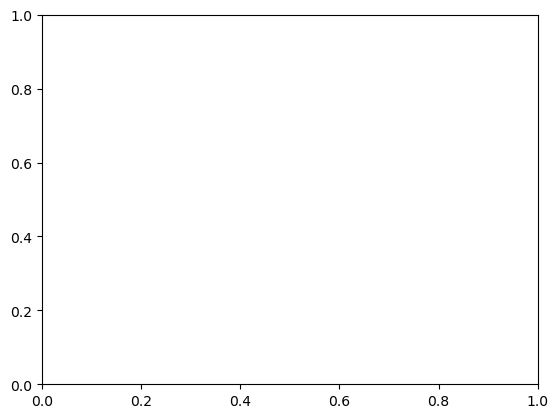

In [22]:


umap_20 = umap_parameters[umap_parameters['n_neighbors']==n_neigbors]
fig, ax1 = plt.subplots()
fig.suptitle("UMAP with {} neighbors".format(voisin), fontsize=16)
ax1.set_xlabel("Resolution Parameter")
ax1.set_ylabel("Modularity Score", color="blue")
ax1.plot(umap_20['resolution'], umap_20['modularity'], 'o-', color="blue", label="Modularity Score")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_ylim(0, 1)
ax2 = ax1.twinx()
ax2.set_ylabel("Number of Clusters", color="gray")
ax2.plot(umap_20['resolution'], umap_20['n_clusters'], 'x--', color="gray", label="Number of Clusters")
ax2.tick_params(axis='y', labelcolor="gray")



fig.tight_layout()
plt.show()

In [24]:
n_neigbors=10




reducer = umap.UMAP(n_neighbors=n_neigbors)
embedding = reducer.fit_transform(Xscaled)
mapper = reducer.fit(Xscaled)
ax.scatter(embedding[:, 0], embedding[:, 1], s=5, c='blue', alpha=0.5)
ax.set_title('UMAP representation', fontsize=10)
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

toto = mapper.graph_.toarray()

umap_df = pd.DataFrame(embedding, columns=('x', 'y'))

adjacency = sparse.csr_matrix(toto)
# name nodes by indices
n_nodes, _ = adjacency.shape
names = np.arange(n_nodes)
SVG(visualize_graph(adjacency, names=names))

plt.show()

leiden = Leiden(resolution=0.5)

labels = leiden.fit_predict(adjacency)
score = silhouette_score(Xscaled, leiden.fit_predict(adjacency))
modularity = get_modularity(adjacency, labels)

SilScore.append(score)

umap_df['cluster_id'] = labels


targetVar=2

if targetVar==1:
    targetVarStr='Group'
    Y_group=data["group_Y"] 
    targetnames=['Y','O']
elif targetVar==2:
    Y_group=data["JND_group"] 
    targetVarStr='JND'
    targetnames=['0','1']   
elif targetVar==0:
    targetVarStr='Cluster'
    targetnames=['1','2']   
    Y_group=data["cluster"] 

data["JND_group"].tolist()

y=labels

print(y)
# f, axes = plt.subplots(1, 1, figsize=(6,6))  # Create a figure with 3 subplots

# cmap = plt.get_cmap("turbo")
# colors = cmap(np.linspace(0, 1, len(set(labels))))
# umap_df['cluster_color'] = [colors[i] for i in labels]
# ax = axes
# ax.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(), marker='o', s=10, c=umap_df['cluster_id'].tolist(), cmap=cmap, alpha=1)
# ax.set_title('UMAP representation with Leiden clustering', fontsize=10)
# ax.set_xlabel('UMAP 1')
# ax.set_ylabel('UMAP 2')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.show()

SVG(visualize_graph(adjacency, labels=y, names=names))


AttributeError: 'numpy.ndarray' object has no attribute 'scatter'